In [1]:
import pandas

# Experiment 1: Route Planning with in-house building blocks

In [2]:
caspyrus50k_results = "<PATH>/led3_score/data/results/1_route_planning/caspyrus_50k_results.csv"
caspyrus50k_results = pandas.read_csv(caspyrus50k_results)
caspyrus50k_results.head()

,clean_smiles,Cluster,Centroid,led3_result,zinc_result
0,COc1cc(OC)cc(N(CCO)c2ccc3ncc(-c4cnn(C)c4)nc3c2)c1,0,True,1,1
1,CCc1ncnc(-c2ccc(C(=O)N3CCN(C(C)=O)CC3)c(F)c2)c...,1,True,1,1
2,COC(=O)N1CCC(n2ncc3c(N4CCOCC4)nc(-c4ccc(NC(=O)...,2,True,1,1
3,CCCCCOC(=O)N1CCN(C(=O)[C@H](CCC(=O)O)NC(=O)c2c...,3,True,0,1
4,COc1cc(OCc2csc(-c3ccccc3)n2)c2cc(-c3cn4nc(OC)s...,4,True,1,1


In [3]:
chembl200k_results = "<PATH>/led3_score/data/results/1_route_planning/chembl200k_results.csv"
chembl200k_results = pandas.read_csv(chembl200k_results)
chembl200k_results.head()

,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key,clean_smiles,led3_result,zinc_result
0,CHEMBL1701388,Cc1ccnc(NC(=O)CNC(=O)c2ccco2)c1,InChI=1S/C13H13N3O3/c1-9-4-5-14-11(7-9)16-12(1...,TVEYOTVLWVJFMS-UHFFFAOYSA-N,Cc1ccnc(NC(=O)CNC(=O)c2ccco2)c1,1,1
1,CHEMBL1396085,COc1ccccc1NS(=O)(=O)c1cc(C(=O)NCC(C)(C)N2CCOCC...,InChI=1S/C23H31N3O5S/c1-17-9-10-18(22(27)24-16...,UNMNWPSZCDFARA-UHFFFAOYSA-N,COc1ccccc1NS(=O)(=O)c1cc(C(=O)NCC(C)(C)N2CCOCC...,1,1
2,CHEMBL114049,C[N+](C)(C)c1cccc(C(=O)OCCCCCCCn2ccc3cc([N+](=...,"InChI=1S/C25H32N3O4.HI/c1-28(2,3)23-11-9-10-21...",LJGUZMILFLOGDO-UHFFFAOYSA-M,C[N+](C)(C)c1cccc(C(=O)OCCCCCCCn2ccc3cc([N+](=...,1,1
3,CHEMBL1081025,O=C(Nc1cccc(-c2cn3ccnc3c(NCc3ccncc3)n2)c1)Nc1c...,InChI=1S/C25H19Cl2N7O/c26-18-4-5-21(20(27)13-1...,HLMIPIHLMFHHMW-UHFFFAOYSA-N,O=C(Nc1cccc(-c2cn3ccnc3c(NCc3ccncc3)n2)c1)Nc1c...,1,2
4,CHEMBL154139,Cc1ccc(/C=C/C(=O)NCCCCN2CCN(C(c3ccccc3)c3ccccc...,InChI=1S/C30H36N4O/c1-25-14-15-26(24-32-25)16-...,DVYCNKDRINREMB-WUKNDPDISA-N,Cc1ccc(/C=C/C(=O)NCCCCN2CCN(C(c3ccccc3)c3ccccc...,1,1


## led 3 results

In [4]:
def calculate_accuracy(results, subset):
    print(f"results for {subset} subset")
    subset_results = results[:subset]
    led_result = len(subset_results[subset_results["led3_result"] >= 1]) / len(subset_results)
    print(f"led3 result: {led_result}")
    zinc_result = len(subset_results[subset_results["zinc_result"] >= 1]) / len(subset_results)
    print(f"zinc result: {zinc_result}")

In [5]:
print("caspyrus 50k")
calculate_accuracy(results=caspyrus50k_results, subset=1000)
calculate_accuracy(results=caspyrus50k_results, subset=10000)
calculate_accuracy(results=caspyrus50k_results, subset=20000)
calculate_accuracy(results=caspyrus50k_results, subset=50000)

print("chembl 200k")
calculate_accuracy(results=chembl200k_results, subset=200000)

caspyrus 50k
results for 1000 subset
led3 result: 0.524
zinc result: 0.698
results for 10000 subset
led3 result: 0.5808
zinc result: 0.7195
results for 20000 subset
led3 result: 0.5929
zinc result: 0.72055
results for 50000 subset
led3 result: 0.59804
zinc result: 0.71568
chembl 200k
results for 200000 subset
led3 result: 0.550405
zinc result: 0.666535


### visualization

In [6]:
import pandas

In [7]:
solved_percentage = {'Led3': [0.524, 0.58080, 0.59290, 0.59804, 0.550405], 'Zinc': [0.698, 0.71950, 0.72055, 0.71568, 0.666535]}
solved_percentage = pandas.DataFrame.from_dict(solved_percentage, orient='index',
                       columns=["Caspyrus1k",'Caspyrus10k', 'Caspyrus20k', 'Caspyrus50k', 'ChEMBL200k'])
solved_percentage

,Caspyrus1k,Caspyrus10k,Caspyrus20k,Caspyrus50k,ChEMBL200k
Led3,0.524,0.5808,0.59290,0.59804,0.550405
Zinc,0.698,0.7195,0.72055,0.71568,0.666535


In [8]:
# melt the dataframe
solved_percentage_melted = solved_percentage.reset_index().melt(id_vars=['index'], value_vars=['Caspyrus1k', 'Caspyrus10k', 'Caspyrus20k', 'Caspyrus50k', 'ChEMBL200k'])
solved_percentage_melted

,index,variable,value
0,Led3,Caspyrus1k,0.524000
1,Zinc,Caspyrus1k,0.698000
2,Led3,Caspyrus10k,0.580800
3,Zinc,Caspyrus10k,0.719500
4,Led3,Caspyrus20k,0.592900
5,Zinc,Caspyrus20k,0.720550
6,Led3,Caspyrus50k,0.598040
7,Zinc,Caspyrus50k,0.715680
8,Led3,ChEMBL200k,0.550405
9,Zinc,ChEMBL200k,0.666535


In [9]:
# change column names to Building Blocks, Dataset, Fraction Solved
solved_percentage_melted.columns = ['Building Blocks', 'Dataset', 'Fraction Solved']

<Figure size 1200x600 with 0 Axes>

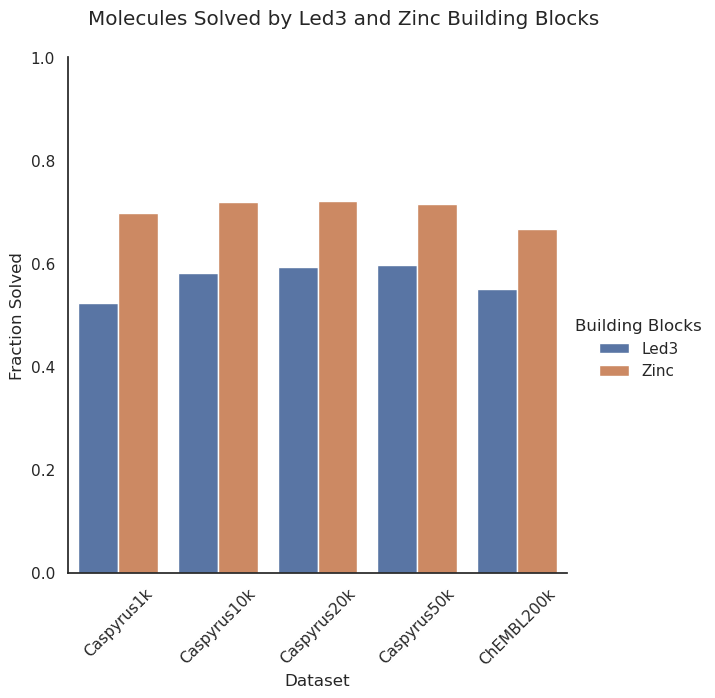

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

plt.figure(figsize=(12, 6))  # Set the figure size

# Create the catplot
g = sns.catplot(
    x="Dataset",
    y="Fraction Solved",
    hue="Building Blocks",
    kind="bar",
    data=solved_percentage_melted,
    height=6,
    aspect=1,
)

# Set y axis limits
g.set(ylim=(0, 1))

# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# Set labels and title
g.set_axis_labels("Dataset", "Fraction Solved")
g.fig.suptitle("Molecules Solved by Led3 and Zinc Building Blocks", y=1.05)

#plt.savefig("./pdfs/experiment_1_route_planning_results.pdf", bbox_inches='tight')
#plt.savefig("./svgs/experiment_1_route_planning_results_with_1k.svg", bbox_inches='tight', format="svg")
# Show the plot
plt.show()

<Figure size 600x600 with 0 Axes>

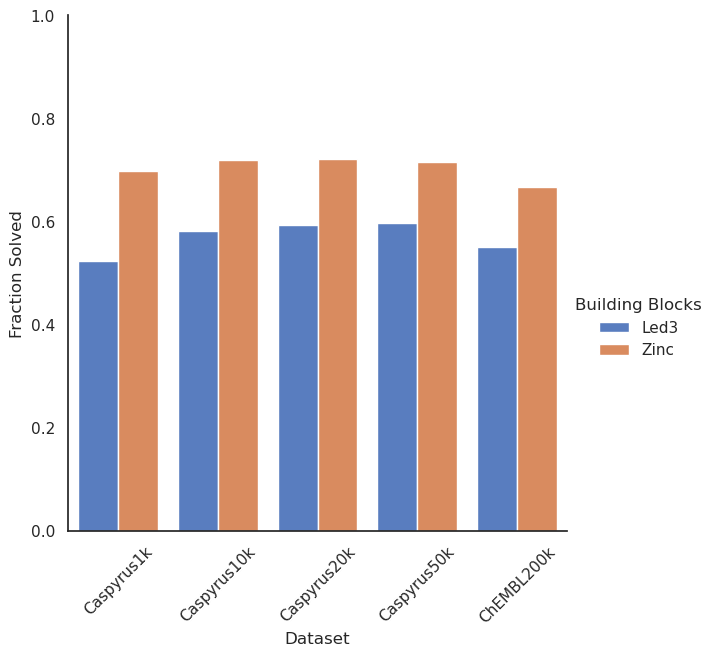

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
palette = sns.color_palette("muted", n_colors=solved_percentage_melted['Building Blocks'].nunique())

plt.figure(figsize=(6, 6))  # Set the figure size

# Create the catplot
g = sns.catplot(
    x="Dataset",
    y="Fraction Solved",
    hue="Building Blocks",
    palette=palette,
    kind="bar",
    data=solved_percentage_melted,
    height=6,
    aspect=1,
)

# Set y axis limits
g.set(ylim=(0, 1))

# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# Set labels and title
g.set_axis_labels("Dataset", "Fraction Solved")
# g.fig.suptitle("Molecules Solved by Led3 and Zinc Building Blocks", y=1.05)

plt.savefig("./pdfs/experiment_1_route_planning_results_new.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_1_route_planning_results_with_1k_new.svg", bbox_inches='tight', format="svg")
# Show the plot
plt.show()

## route length

In [1]:
import pandas

led_caspyrus50k = "<PATH>/led3_score/data/results/1_route_planning/original_files/caspyrus50k/led3_caspyrus50k_results.csv"
zinc_caspyrus50k = "<PATH>/led3_score/data/results/1_route_planning/original_files/caspyrus50k/zinc_caspyrus50k_results.csv"

led_caspyrus50k = pandas.read_csv(led_caspyrus50k, usecols=["target", 'number_of_solved_routes', "number_of_steps"])
zinc_caspyrus50k = pandas.read_csv(zinc_caspyrus50k, usecols=["target", 'number_of_solved_routes',"number_of_steps"])

led_chembl200k = "<PATH>/led3_score/data/results/1_route_planning/original_files/chembl200k/led_chembl200k_results.csv"
zinc_chembl200k = "<PATH>/led3_score/data/results/1_route_planning/original_files/chembl200k/zinc_chembl_200k_results.csv"

led_chembl200k = pandas.read_csv(led_chembl200k, usecols=["target", 'number_of_solved_routes', "number_of_steps"])
zinc_chembl200k = pandas.read_csv(zinc_chembl200k, usecols=["target", 'number_of_solved_routes',"number_of_steps"])

In [2]:
led_chembl200k.head()

,target,number_of_solved_routes,number_of_steps
0,Cc1ccnc(NC(=O)CNC(=O)c2ccco2)c1,1,1
1,COc1ccccc1NS(=O)(=O)c1cc(C(=O)NCC(C)(C)N2CCOCC...,1,6
2,C[N+](C)(C)c1cccc(C(=O)OCCCCCCCn2ccc3cc([N+](=...,1,6
3,O=C(Nc1cccc(-c2cn3ccnc3c(NCc3ccncc3)n2)c1)Nc1c...,1,9
4,Cc1ccc(/C=C/C(=O)NCCCCN2CCN(C(c3ccccc3)c3ccccc...,1,9


In [3]:
def extract_max_steps_from_solved_routes(result_table):
    subset = result_table[result_table['number_of_solved_routes'] >= 1]
    return subset['number_of_steps']

def add_subset_to_df(df, result_table, dataset_name, building_block_name):
    steps = extract_max_steps_from_solved_routes(result_table)
    subset_df = pandas.DataFrame(steps)
    subset_df.columns = ['number_of_steps']
    subset_df['dataset'] = dataset_name
    subset_df['building_blocks'] = building_block_name
    return pandas.concat([df, subset_df], ignore_index=True)

# Initial dataset
steps = extract_max_steps_from_solved_routes(led_caspyrus50k[:1000])
df = pandas.DataFrame(steps)
df.columns = ['number_of_steps']
df['dataset'] = 'Caspyrus1k'
df['building_blocks'] = 'Led3'

# Add more subsets
df = add_subset_to_df(df, led_caspyrus50k[:10000], 'Caspyrus10k', 'Led3')
df = add_subset_to_df(df, led_caspyrus50k[:20000], 'Caspyrus20k', 'Led3')
df = add_subset_to_df(df, led_caspyrus50k, 'Caspyrus50k', 'Led3')

df = add_subset_to_df(df, zinc_caspyrus50k[:1000], 'Caspyrus1k', 'Zinc')
df = add_subset_to_df(df, zinc_caspyrus50k[:10000], 'Caspyrus10k', 'Zinc')
df = add_subset_to_df(df, zinc_caspyrus50k[:20000], 'Caspyrus20k', 'Zinc')
df = add_subset_to_df(df, zinc_caspyrus50k, 'Caspyrus50k', 'Zinc')

# chembl200k
df = add_subset_to_df(df, led_chembl200k, 'ChEMBL200k', 'Led3')
df = add_subset_to_df(df, zinc_chembl200k, 'ChEMBL200k', 'Zinc')

print(df)

        number_of_steps     dataset building_blocks
0                    10  Caspyrus1k            Led3
1                     6  Caspyrus1k            Led3
2                     8  Caspyrus1k            Led3
3                     8  Caspyrus1k            Led3
4                     9  Caspyrus1k            Led3
...                 ...         ...             ...
349563                6  ChEMBL200k            Zinc
349564                7  ChEMBL200k            Zinc
349565                2  ChEMBL200k            Zinc
349566                9  ChEMBL200k            Zinc
349567                6  ChEMBL200k            Zinc

[349568 rows x 3 columns]


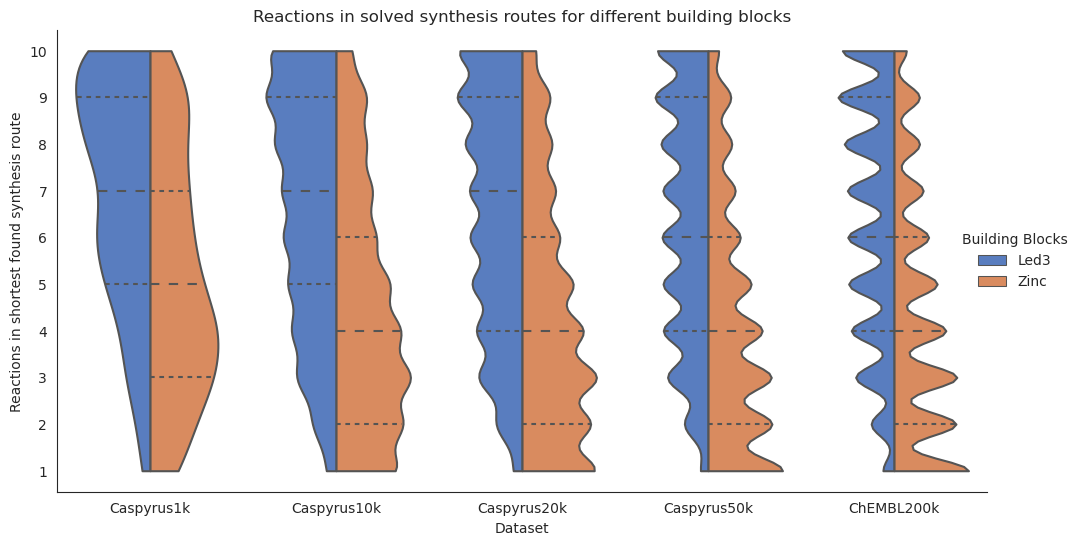

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("white")

plt.figure(figsize=(12, 6))
sns.violinplot(x='dataset', y='number_of_steps', hue='building_blocks', data=df, split=True, inner='quartile', palette="muted", scale="area", cut=0)
plt.title("Reactions in solved synthesis routes for different building blocks")
plt.ylabel("Reactions in shortest found synthesis route")
plt.xlabel("Dataset")

plt.yticks(np.arange(min(df['number_of_steps']), max(df['number_of_steps'])+1, 1))

# Move the legend to the top right corner
legend = plt.legend(title="Building Blocks", loc='center right', bbox_to_anchor=(1.1, 0.5))
legend.get_frame().set_edgecolor('none')  # Remove legend border


sns.despine(left=False, bottom=False)
plt.show()

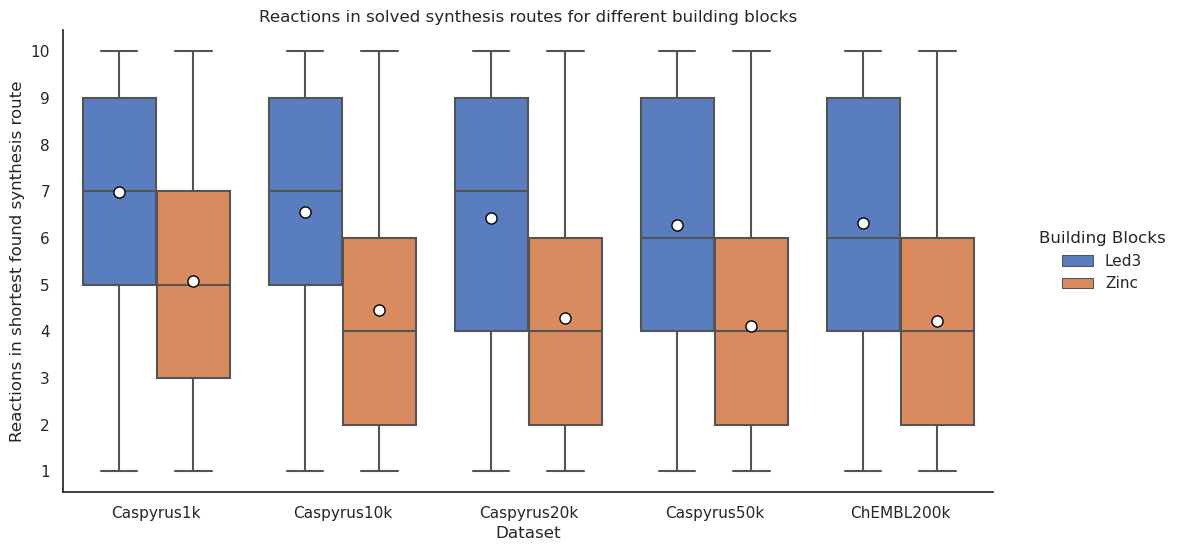

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.set_theme(style="white")

sns.boxplot(x='dataset', y='number_of_steps', hue='building_blocks', data=df, palette= "muted", showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
plt.title("Reactions in solved synthesis routes for different building blocks")
plt.ylabel("Reactions in shortest found synthesis route")
plt.xlabel("Dataset")

# Adjust y-axis step size to 1
plt.yticks(np.arange(min(df['number_of_steps']), max(df['number_of_steps'])+1, 1))
#plt.xticks(rotation=45)

# Move the legend to the top right corner
legend = plt.legend(title="Building Blocks", loc='center right', bbox_to_anchor=(1.2, 0.5))
legend.get_frame().set_edgecolor('none')  # Remove legend border

sns.despine(left=False, bottom=False)
#plt.savefig("./svgs/experiment_1_route_length.svg", bbox_inches='tight', format="svg")
plt.show()

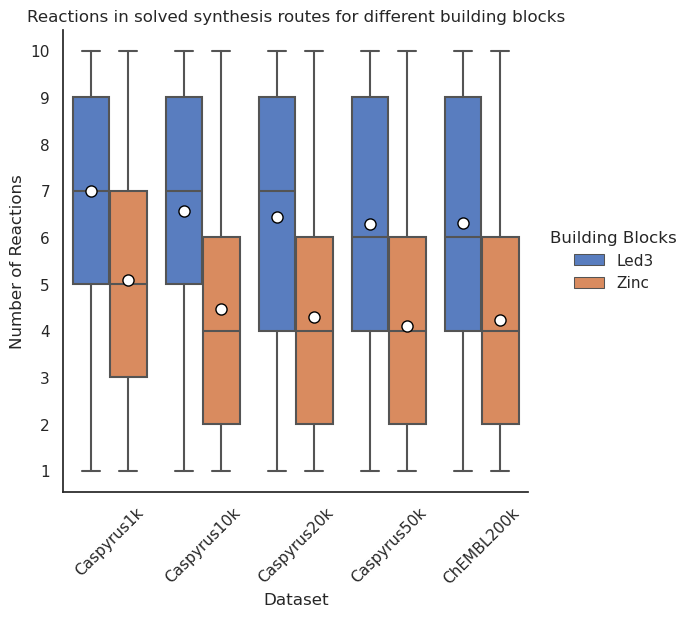

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.set_theme(style="white")

sns.boxplot(x='dataset', y='number_of_steps', hue='building_blocks', data=df, palette= "muted", showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
plt.title("Reactions in solved synthesis routes for different building blocks")
plt.ylabel("Number of Reactions")
plt.xlabel("Dataset")

# Adjust y-axis step size to 1
plt.yticks(np.arange(min(df['number_of_steps']), max(df['number_of_steps'])+1, 1))
plt.xticks(rotation=45)

# Move the legend to the top right corner
legend = plt.legend(title="Building Blocks", loc='center right', bbox_to_anchor=(1.35, 0.5))
legend.get_frame().set_edgecolor('none')  # Remove legend border

sns.despine(left=False, bottom=False)
#plt.savefig("./svgs/experiment_1_route_length.svg", bbox_inches='tight', format="svg")
plt.show()

In [61]:
summary_stats = df.groupby(['dataset', 'building_blocks'])['number_of_steps'].describe()
summary_stats.to_csv("<PATH>/led3_score/5_paper/data/experiment_1_route_lengths_summary_stats.csv", index = True)
summary_stats

count      mean       std  min  25%  50%  75%  \
dataset     building_blocks                                                     
Caspyrus10k Led3               5808.0  6.558196  2.549605  1.0  5.0  7.0  9.0   
            Zinc               7195.0  4.457401  2.584187  1.0  2.0  4.0  6.0   
Caspyrus1k  Led3                524.0  6.990458  2.433416  1.0  5.0  7.0  9.0   
            Zinc                698.0  5.080229  2.572760  1.0  3.0  5.0  7.0   
Caspyrus20k Led3              11858.0  6.432366  2.567307  1.0  4.0  7.0  9.0   
            Zinc              14411.0  4.283811  2.584736  1.0  2.0  4.0  6.0   
Caspyrus50k Led3              29902.0  6.282456  2.561275  1.0  4.0  6.0  9.0   
            Zinc              35784.0  4.108037  2.563768  1.0  2.0  4.0  6.0   
ChEMBL200k  Led3             110081.0  6.311189  2.583535  1.0  4.0  6.0  9.0   
            Zinc             133307.0  4.218946  2.619368  1.0  2.0  4.0  6.0   

                              max  
dataset     building_blocks        
Caspyrus10k Led3             10.0  
            Zinc             10.0  
Caspyrus1k  Led3             10.0  
            Zinc             10.0  
Caspyrus20k Led3             10.0  
            Zinc             10.0  
Caspyrus50k Led3             10.0  
            Zinc             10.0  
ChEMBL200k  Led3             10.0  
            Zinc             10.0

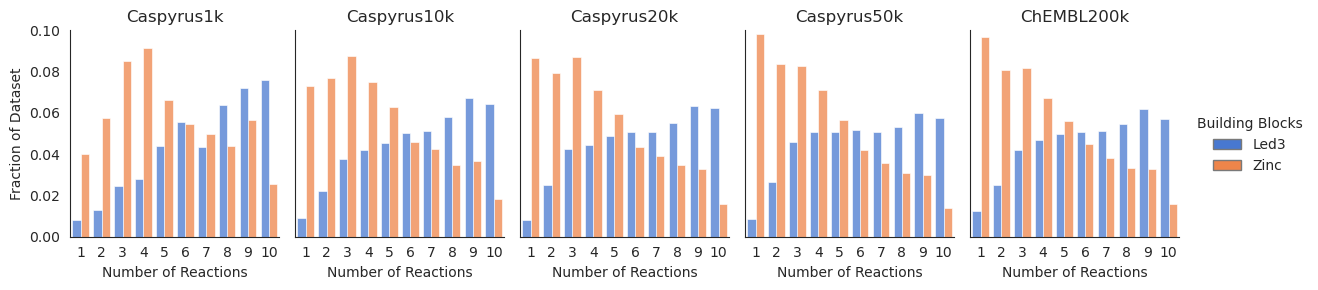

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

sns.set_style("white")
sns.set_palette("muted")

# Unique datasets
unique_datasets = df['dataset'].unique()

# Set up the figure and axes
fig, axes = plt.subplots(1, len(unique_datasets), figsize=(12, 3), sharey=True)

# Define the palette
#palette = sns.color_palette("muted", n_colors=df['building_blocks'].nunique())

for i, dataset in enumerate(unique_datasets):
    subset = df[df['dataset'] == dataset]
    
    # Define bin edges to center bars on x-axis ticks
    bin_edges = np.arange(df['number_of_steps'].min() - 0.5, df['number_of_steps'].max() + 1.5, 1)
    
    sns.histplot(data=subset, x='number_of_steps', hue='building_blocks'
                 #, palette=palette
                 , bins=bin_edges, kde=False, ax=axes[i], stat="probability", multiple="dodge", shrink=0.8)
    
    axes[i].set_title(dataset)
    axes[i].set_xlabel("Number of Reactions")
    if i == 0:
        axes[i].set_ylabel("Fraction of Dataset")
    else:
        axes[i].set_ylabel("")
    axes[i].set_ylim(0, 0.1)
    axes[i].set_xticks(np.arange(df['number_of_steps'].min(), df['number_of_steps'].max() + 1, 1))
    axes[i].set_xlim(df['number_of_steps'].min() - 0.5, df['number_of_steps'].max() + 0.5)  # Adjust x-axis limits to center bars
    axes[i].get_legend().remove()

# Create a custom legend using unique building_blocks and the palette
legend_labels = df['building_blocks'].unique()

edge_palette = sns.color_palette("muted") 
legend_handles = [Patch(facecolor=palette[i], edgecolor=edge_palette[7], label=legend_labels[i]) for i in range(len(legend_labels))]
legend = fig.legend(handles=legend_handles, title="Building Blocks", loc='center right', bbox_to_anchor=(1.1, 0.5))
legend.get_frame().set_edgecolor('none')

sns.despine(left=False, bottom=False)
plt.tight_layout()
#plt.savefig("./svgs/experiment_1_route_length_distributions.svg", bbox_inches='tight', format="svg")
plt.show()

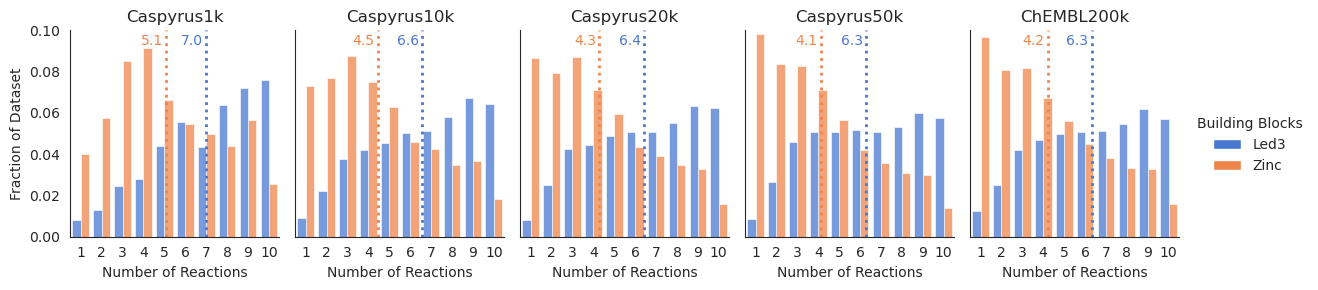

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

sns.set_style("white")

# Unique datasets
unique_datasets = df['dataset'].unique()

# Set up the figure and axes
fig, axes = plt.subplots(1, len(unique_datasets), figsize=(12, 3), sharey=True)

# Define the palette
palette = sns.color_palette("muted", n_colors=df['building_blocks'].nunique())

for i, dataset in enumerate(unique_datasets):
    subset = df[df['dataset'] == dataset]
    
    # Define bin edges to center bars on x-axis ticks
    bin_edges = np.arange(df['number_of_steps'].min() - 0.5, df['number_of_steps'].max() + 1.5, 1)
    
    sns.histplot(data=subset, x='number_of_steps', hue='building_blocks' ,palette=palette, bins=bin_edges, kde=False, ax=axes[i], stat="probability", multiple="dodge", shrink=0.8)
    
    # Calculate and plot the mean for each building block
    for building_block in subset['building_blocks'].unique():
        mean_value = subset[subset['building_blocks'] == building_block]['number_of_steps'].mean()
        axes[i].axvline(mean_value, color=palette[np.where(subset['building_blocks'].unique() == building_block)[0][0]], linestyle='dotted', linewidth=2)
        text_x_position = mean_value - 0.15
        text_y_position = 0.093
        axes[i].text(text_x_position, text_y_position, f'{mean_value:.1f}', color=palette[np.where(subset['building_blocks'].unique() == building_block)[0][0]], ha='right')

    axes[i].set_title(dataset)
    axes[i].set_xlabel("Number of Reactions")
    if i == 0:
        axes[i].set_ylabel("Fraction of Dataset")
    else:
        axes[i].set_ylabel("")
    axes[i].set_ylim(0, 0.1)
    axes[i].set_xticks(np.arange(df['number_of_steps'].min(), df['number_of_steps'].max() + 1, 1))
    axes[i].set_xlim(df['number_of_steps'].min() - 0.5, df['number_of_steps'].max() + 0.5)
    if axes[i].get_legend():
        axes[i].get_legend().remove()

# Create a custom legend using unique building_blocks and the palette
legend_labels = df['building_blocks'].unique()

legend_handles = [Patch(facecolor=palette[i], label=legend_labels[i]) for i in range(len(legend_labels))]
legend = fig.legend(handles=legend_handles, title="Building Blocks", loc='center right', bbox_to_anchor=(1.1, 0.5))
legend.get_frame().set_edgecolor('none')

sns.despine(left=False, bottom=False)
plt.tight_layout()
#plt.savefig("./pdfs/experiment_1_route_length_distributions_with_mean.pdf", bbox_inches='tight')
#plt.savefig("./svgs/experiment_1_route_length_distributions_with_mean.svg", bbox_inches='tight', format="svg")
plt.show()

# Experiment 2: In-House Synthesizability Score

In [1]:
import pandas

led3_results = ["<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus1k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus10k_hist_xgboost.csv", 
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus20k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_caspyrus50k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/led3_chembl200k_random_hist_xgboost.csv"
]

# load all results into a single dataframe
led3_results = pandas.concat([pandas.read_csv(f) for f in led3_results], ignore_index=True)
print(led3_results.columns)
led3_results

Index(['hyperparameter_sweep_name', 'ID', 'learning_rate', 'max_depth',
       'min_split_loss', 'n_estimators',
       'hyperparameter_training_dataset_path', 'name',
       'hyperparameter_search_accuracy', 'hyperparameter_search_f1',
       'hyperparameter_search_mcc', 'hyperparameter_search_precision',
       'hyperparameter_search_recall', 'train_dataset_path',
       'test_dataset_path', 'chembl_test_dataset_path', 'y_column',
       'save_path', 'train_accuracy', 'train_precision', 'train_recall',
       'train_f1', 'train_mcc', 'test_accuracy', 'test_precision',
       'test_recall', 'test_f1', 'test_mcc', 'chembl_test_accuracy',
       'chembl_test_precision', 'chembl_test_recall', 'chembl_test_f1',
       'chembl_test_mcc'],
      dtype='object')


,hyperparameter_sweep_name,ID,learning_rate,max_depth,min_split_loss,n_estimators,hyperparameter_training_dataset_path,name,hyperparameter_search_accuracy,hyperparameter_search_f1,...,test_accuracy,test_precision,test_recall,test_f1,test_mcc,chembl_test_accuracy,chembl_test_precision,chembl_test_recall,chembl_test_f1,chembl_test_mcc
0,hearty-sweep-896,szp7e473,0.271941,1,4.949750,205,/led3_score/data/res...,led3_caspyrus1k_hist_xgboost,0.687778,0.718719,...,0.69000,0.677966,0.769231,0.720721,0.379294,0.707925,0.689870,0.853810,0.763135,0.408705
1,valiant-sweep-453,dyym3owa,0.268463,18,0.009334,244,/led3_score/data/res...,led3_caspyrus10k_hist_xgboost,0.781556,0.817760,...,0.78900,0.801303,0.846816,0.823431,0.563139,0.784910,0.775495,0.858102,0.814710,0.564036
2,silvery-sweep-190,ucmrdqut,0.195864,17,0.039415,244,/led3_score/data/res...,led3_caspyrus20k_hist_xgboost,0.806333,0.841617,...,0.81000,0.826580,0.860034,0.842975,0.603469,0.803390,0.799348,0.858792,0.828004,0.601347
3,worthy-sweep-273,5o6k3l0p,0.199536,17,0.015818,223,/led3_score/data/res...,led3_caspyrus50k_hist_xgboost,0.832444,0.863865,...,0.83820,0.851208,0.883946,0.867268,0.661058,0.824910,0.822324,0.870315,0.845639,0.645147
4,restful-sweep-707,zce9hhl3,0.228350,18,0.092618,241,/led3_score/data/res...,led3_chembl200k_random_hist_xgboost,0.873922,0.887603,...,0.88015,0.879306,0.906704,0.892795,0.757449,0.879280,0.876772,0.908641,0.892422,0.755627


In [2]:
for index, row in led3_results.iterrows():
    print(f"Name: {row['name']}, Learning Rate: {row['learning_rate']}, Max Depth: {row['max_depth']} Min Split Loss: {row['min_split_loss']} , n_estimators: {row['n_estimators']}")

Name: led3_caspyrus1k_hist_xgboost, Learning Rate: 0.2719409364674159, Max Depth: 1 Min Split Loss: 4.949750125712117 , n_estimators: 205
Name: led3_caspyrus10k_hist_xgboost, Learning Rate: 0.2684628436174173, Max Depth: 18 Min Split Loss: 0.0093335650231907 , n_estimators: 244
Name: led3_caspyrus20k_hist_xgboost, Learning Rate: 0.1958635394821213, Max Depth: 17 Min Split Loss: 0.0394150136402293 , n_estimators: 244
Name: led3_caspyrus50k_hist_xgboost, Learning Rate: 0.1995355065635398, Max Depth: 17 Min Split Loss: 0.0158175920028569 , n_estimators: 223
Name: led3_chembl200k_random_hist_xgboost, Learning Rate: 0.2283497027825638, Max Depth: 18 Min Split Loss: 0.0926178008892042 , n_estimators: 241


In [3]:
relevant_led3_results = led3_results[["name", "train_accuracy", "train_f1", "train_mcc", "test_accuracy","test_f1","test_mcc", "chembl_test_accuracy","chembl_test_f1", "chembl_test_mcc"]]
relevant_led3_results["Building Blocks"] = "Led3"
relevant_led3_results

/tmp/ipykernel_362990/2364849892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_led3_results["Building Blocks"] = "Led3"


,name,train_accuracy,train_f1,train_mcc,test_accuracy,test_f1,test_mcc,chembl_test_accuracy,chembl_test_f1,chembl_test_mcc,Building Blocks
0,led3_caspyrus1k_hist_xgboost,0.763333,0.785498,0.526165,0.69000,0.720721,0.379294,0.707925,0.763135,0.408705,Led3
1,led3_caspyrus10k_hist_xgboost,1.000000,1.000000,1.000000,0.78900,0.823431,0.563139,0.784910,0.814710,0.564036,Led3
2,led3_caspyrus20k_hist_xgboost,1.000000,1.000000,1.000000,0.81000,0.842975,0.603469,0.803390,0.828004,0.601347,Led3
3,led3_caspyrus50k_hist_xgboost,1.000000,1.000000,1.000000,0.83820,0.867268,0.661058,0.824910,0.845639,0.645147,Led3
4,led3_chembl200k_random_hist_xgboost,0.999350,0.999410,0.998687,0.88015,0.892795,0.757449,0.879280,0.892422,0.755627,Led3


In [4]:
zinc_results = ["<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus1k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus10k_hist_xgboost.csv", 
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus20k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_caspyrus50k_hist_xgboost.csv",
"<PATH>/led3_score/data/results/2_synthesis_score/models/zinc_chembl200k_random_hist_xgboost.csv"
]

# load all results into a single dataframe
zinc_results = pandas.concat([pandas.read_csv(f) for f in zinc_results], ignore_index=True)
print(zinc_results.columns)
zinc_results

Index(['hyperparameter_sweep_name', 'ID', 'learning_rate', 'max_depth',
       'min_split_loss', 'n_estimators',
       'hyperparameter_training_dataset_path', 'name',
       'hyperparameter_search_accuracy', 'hyperparameter_search_f1',
       'hyperparameter_search_mcc', 'hyperparameter_search_precision',
       'hyperparameter_search_recall', 'train_dataset_path',
       'test_dataset_path', 'chembl_test_dataset_path', 'y_column',
       'save_path', 'train_accuracy', 'train_precision', 'train_recall',
       'train_f1', 'train_mcc', 'test_accuracy', 'test_precision',
       'test_recall', 'test_f1', 'test_mcc', 'chembl_test_accuracy',
       'chembl_test_precision', 'chembl_test_recall', 'chembl_test_f1',
       'chembl_test_mcc'],
      dtype='object')


,hyperparameter_sweep_name,ID,learning_rate,max_depth,min_split_loss,n_estimators,hyperparameter_training_dataset_path,name,hyperparameter_search_accuracy,hyperparameter_search_f1,...,test_accuracy,test_precision,test_recall,test_f1,test_mcc,chembl_test_accuracy,chembl_test_precision,chembl_test_recall,chembl_test_f1,chembl_test_mcc
0,resilient-sweep-892,pun1bmxl,0.156069,34,0.220020,247,/led3_score/data/res...,zinc_caspyrus1k_hist_xgboost,0.795556,0.860395,...,0.77000,0.851852,0.862500,0.857143,0.267652,0.775235,0.778699,0.926215,0.846075,0.464521
1,visionary-sweep-944,hs5c0kut,0.111861,14,0.060924,221,/led3_score/data/res...,zinc_caspyrus10k_hist_xgboost,0.827111,0.885991,...,0.83000,0.851064,0.930233,0.888889,0.539825,0.817655,0.819260,0.932265,0.872117,0.573439
2,snowy-sweep-592,4ynzjm8r,0.096781,14,0.265456,221,/led3_score/data/res...,zinc_caspyrus20k_hist_xgboost,0.839000,0.893542,...,0.83650,0.851104,0.936806,0.891901,0.570639,0.830100,0.834064,0.930346,0.879578,0.604394
3,confused-sweep-444,zpvw0x5h,0.140564,16,0.055657,243,/led3_score/data/res...,zinc_caspyrus50k_hist_xgboost,0.858133,0.904861,...,0.86600,0.877270,0.944941,0.909849,0.657195,0.847705,0.855956,0.927782,0.890423,0.647770
4,fancy-sweep-862,jalmp4oo,0.166951,18,0.089983,245,/led3_score/data/res...,zinc_chembl200k_random_hist_xgboost,0.884294,0.915774,...,0.89535,0.900283,0.948764,0.923888,0.759499,0.890790,0.895374,0.946899,0.920416,0.749848


In [5]:
for index, row in zinc_results.iterrows():
    print(f"Name: {row['name']}, Learning Rate: {row['learning_rate']}, Max Depth: {row['max_depth']} Min Split Loss: {row['min_split_loss']} , n_estimators: {row['n_estimators']}")

Name: zinc_caspyrus1k_hist_xgboost, Learning Rate: 0.1560691576705119, Max Depth: 34 Min Split Loss: 0.220019588299537 , n_estimators: 247
Name: zinc_caspyrus10k_hist_xgboost, Learning Rate: 0.1118608561724336, Max Depth: 14 Min Split Loss: 0.0609241965336193 , n_estimators: 221
Name: zinc_caspyrus20k_hist_xgboost, Learning Rate: 0.0967806183261539, Max Depth: 14 Min Split Loss: 0.2654559091392927 , n_estimators: 221
Name: zinc_caspyrus50k_hist_xgboost, Learning Rate: 0.1405641158752425, Max Depth: 16 Min Split Loss: 0.0556569245323568 , n_estimators: 243
Name: zinc_chembl200k_random_hist_xgboost, Learning Rate: 0.1669507279201956, Max Depth: 18 Min Split Loss: 0.0899831624808777 , n_estimators: 245


In [6]:
relevant_zinc_results = zinc_results[["name", "train_accuracy", "train_f1", "train_mcc", "test_accuracy","test_f1","test_mcc", "chembl_test_accuracy","chembl_test_f1", "chembl_test_mcc"]]
relevant_zinc_results["Building Blocks"] = "Zinc"
relevant_zinc_results

/tmp/ipykernel_362990/971879083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_zinc_results["Building Blocks"] = "Zinc"


,name,train_accuracy,train_f1,train_mcc,test_accuracy,test_f1,test_mcc,chembl_test_accuracy,chembl_test_f1,chembl_test_mcc,Building Blocks
0,zinc_caspyrus1k_hist_xgboost,1.000000,1.000000,1.000000,0.77000,0.857143,0.267652,0.775235,0.846075,0.464521,Zinc
1,zinc_caspyrus10k_hist_xgboost,1.000000,1.000000,1.000000,0.83000,0.888889,0.539825,0.817655,0.872117,0.573439,Zinc
2,zinc_caspyrus20k_hist_xgboost,0.999944,0.999961,0.999862,0.83650,0.891901,0.570639,0.830100,0.879578,0.604394,Zinc
3,zinc_caspyrus50k_hist_xgboost,1.000000,1.000000,1.000000,0.86600,0.909849,0.657195,0.847705,0.890423,0.647770,Zinc
4,zinc_chembl200k_random_hist_xgboost,0.999544,0.999658,0.998976,0.89535,0.923888,0.759499,0.890790,0.920416,0.749848,Zinc


In [7]:
## combine led3 and zinc results
results = pandas.concat([relevant_led3_results, relevant_zinc_results], ignore_index=True)
results

,name,train_accuracy,train_f1,train_mcc,test_accuracy,test_f1,test_mcc,chembl_test_accuracy,chembl_test_f1,chembl_test_mcc,Building Blocks
0,led3_caspyrus1k_hist_xgboost,0.763333,0.785498,0.526165,0.69000,0.720721,0.379294,0.707925,0.763135,0.408705,Led3
1,led3_caspyrus10k_hist_xgboost,1.000000,1.000000,1.000000,0.78900,0.823431,0.563139,0.784910,0.814710,0.564036,Led3
2,led3_caspyrus20k_hist_xgboost,1.000000,1.000000,1.000000,0.81000,0.842975,0.603469,0.803390,0.828004,0.601347,Led3
3,led3_caspyrus50k_hist_xgboost,1.000000,1.000000,1.000000,0.83820,0.867268,0.661058,0.824910,0.845639,0.645147,Led3
4,led3_chembl200k_random_hist_xgboost,0.999350,0.999410,0.998687,0.88015,0.892795,0.757449,0.879280,0.892422,0.755627,Led3
5,zinc_caspyrus1k_hist_xgboost,1.000000,1.000000,1.000000,0.77000,0.857143,0.267652,0.775235,0.846075,0.464521,Zinc
6,zinc_caspyrus10k_hist_xgboost,1.000000,1.000000,1.000000,0.83000,0.888889,0.539825,0.817655,0.872117,0.573439,Zinc
7,zinc_caspyrus20k_hist_xgboost,0.999944,0.999961,0.999862,0.83650,0.891901,0.570639,0.830100,0.879578,0.604394,Zinc
8,zinc_caspyrus50k_hist_xgboost,1.000000,1.000000,1.000000,0.86600,0.909849,0.657195,0.847705,0.890423,0.647770,Zinc
9,zinc_chembl200k_random_hist_xgboost,0.999544,0.999658,0.998976,0.89535,0.923888,0.759499,0.890790,0.920416,0.749848,Zinc


In [8]:
# melt the dataframe
results_melted = results.reset_index().melt(id_vars=['index', 'name', 'Building Blocks'], value_vars=['train_accuracy', 'train_f1', 'train_mcc', 'test_accuracy','test_f1','test_mcc', 'chembl_test_accuracy','chembl_test_f1', 'chembl_test_mcc'])
results_melted

,index,name,Building Blocks,variable,value
0,0,led3_caspyrus1k_hist_xgboost,Led3,train_accuracy,0.763333
1,1,led3_caspyrus10k_hist_xgboost,Led3,train_accuracy,1.000000
2,2,led3_caspyrus20k_hist_xgboost,Led3,train_accuracy,1.000000
3,3,led3_caspyrus50k_hist_xgboost,Led3,train_accuracy,1.000000
4,4,led3_chembl200k_random_hist_xgboost,Led3,train_accuracy,0.999350
...,...,...,...,...,...
85,5,zinc_caspyrus1k_hist_xgboost,Zinc,chembl_test_mcc,0.464521
86,6,zinc_caspyrus10k_hist_xgboost,Zinc,chembl_test_mcc,0.573439
87,7,zinc_caspyrus20k_hist_xgboost,Zinc,chembl_test_mcc,0.604394
88,8,zinc_caspyrus50k_hist_xgboost,Zinc,chembl_test_mcc,0.647770


In [9]:
# take only test_f1, test_mcc, chembl_test_f1, chembl_test_mcc
results_melted = results_melted[results_melted["variable"].isin(["test_f1", "test_mcc", "chembl_test_f1", "chembl_test_mcc"])]
results_melted

,index,name,Building Blocks,variable,value
40,0,led3_caspyrus1k_hist_xgboost,Led3,test_f1,0.720721
41,1,led3_caspyrus10k_hist_xgboost,Led3,test_f1,0.823431
42,2,led3_caspyrus20k_hist_xgboost,Led3,test_f1,0.842975
43,3,led3_caspyrus50k_hist_xgboost,Led3,test_f1,0.867268
44,4,led3_chembl200k_random_hist_xgboost,Led3,test_f1,0.892795
45,5,zinc_caspyrus1k_hist_xgboost,Zinc,test_f1,0.857143
46,6,zinc_caspyrus10k_hist_xgboost,Zinc,test_f1,0.888889
47,7,zinc_caspyrus20k_hist_xgboost,Zinc,test_f1,0.891901
48,8,zinc_caspyrus50k_hist_xgboost,Zinc,test_f1,0.909849
49,9,zinc_chembl200k_random_hist_xgboost,Zinc,test_f1,0.923888


In [10]:
results_melted["name"] = results_melted["name"].str.replace("zinc_", "")
results_melted["name"] = results_melted["name"].str.replace("led3_", "")
results_melted["name"] = results_melted["name"].str.replace("_hist_xgboost", "")
results_melted["name"] = results_melted["name"].str.replace("chembl200k_random", "ChEMBL200k")
results_melted["name"] = results_melted["name"].str.replace("caspyrus", "Caspyrus")

# change column name name to Dataset
results_melted.columns = ['index', 'Dataset', 'Building Blocks', 'Metric', 'Value']
results_melted

/tmp/ipykernel_362990/3826806576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_melted["name"] = results_melted["name"].str.replace("zinc_", "")
/tmp/ipykernel_362990/3826806576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_melted["name"] = results_melted["name"].str.replace("led3_", "")
/tmp/ipykernel_362990/3826806576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,index,Dataset,Building Blocks,Metric,Value
40,0,Caspyrus1k,Led3,test_f1,0.720721
41,1,Caspyrus10k,Led3,test_f1,0.823431
42,2,Caspyrus20k,Led3,test_f1,0.842975
43,3,Caspyrus50k,Led3,test_f1,0.867268
44,4,ChEMBL200k,Led3,test_f1,0.892795
45,5,Caspyrus1k,Zinc,test_f1,0.857143
46,6,Caspyrus10k,Zinc,test_f1,0.888889
47,7,Caspyrus20k,Zinc,test_f1,0.891901
48,8,Caspyrus50k,Zinc,test_f1,0.909849
49,9,ChEMBL200k,Zinc,test_f1,0.923888


In [11]:
# test
test_results_melted = results_melted[results_melted["Metric"].isin(["test_f1", "test_mcc"])]
test_results_melted

,index,Dataset,Building Blocks,Metric,Value
40,0,Caspyrus1k,Led3,test_f1,0.720721
41,1,Caspyrus10k,Led3,test_f1,0.823431
42,2,Caspyrus20k,Led3,test_f1,0.842975
43,3,Caspyrus50k,Led3,test_f1,0.867268
44,4,ChEMBL200k,Led3,test_f1,0.892795
45,5,Caspyrus1k,Zinc,test_f1,0.857143
46,6,Caspyrus10k,Zinc,test_f1,0.888889
47,7,Caspyrus20k,Zinc,test_f1,0.891901
48,8,Caspyrus50k,Zinc,test_f1,0.909849
49,9,ChEMBL200k,Zinc,test_f1,0.923888


/tmp/ipykernel_362990/3711201680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results_melted["Metric"] = test_results_melted["Metric"].str.replace("test_f1", "F1")
/tmp/ipykernel_362990/3711201680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_results_melted["Metric"] = test_results_melted["Metric"].str.replace("test_mcc", "MCC")


Text(0.5, 1.05, 'Model Performance on Test Datasets')

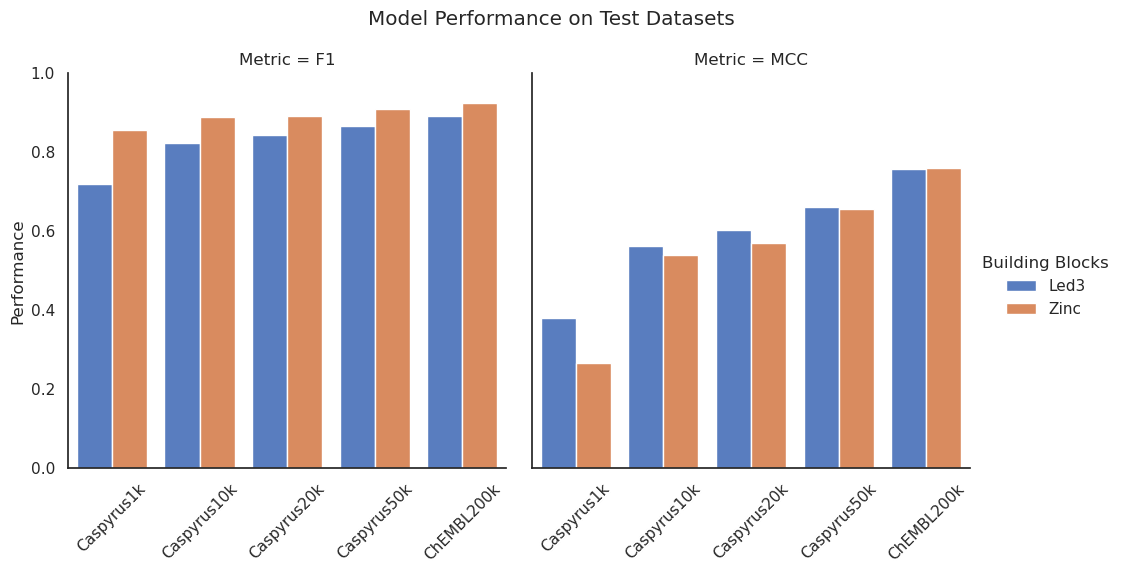

In [12]:
# replace test_f1 with F1 and test_mcc with MCC
test_results_melted["Metric"] = test_results_melted["Metric"].str.replace("test_f1", "F1")
test_results_melted["Metric"] = test_results_melted["Metric"].str.replace("test_mcc", "MCC")

# plot with seaborn barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
palette = sns.color_palette("muted", n_colors=2)

ax = sns.catplot(x="Dataset", y="Value", hue="Building Blocks",palette=palette, data=test_results_melted, kind = "bar", col="Metric", sharey=True, sharex=True)

# y axis from 0 to 1
ax.set(ylim=(0, 1))

# rotate the x axis labels
ax.set_xticklabels(rotation=45)

# rename the y axis label
ax.set_axis_labels("", "Performance")

# set the title
ax.fig.suptitle('Model Performance on Test Datasets', y=1.05)

In [13]:
# chembl test
chembl_test_results_melted = results_melted[results_melted["Metric"].isin(["chembl_test_f1", "chembl_test_mcc"])]
chembl_test_results_melted

,index,Dataset,Building Blocks,Metric,Value
70,0,Caspyrus1k,Led3,chembl_test_f1,0.763135
71,1,Caspyrus10k,Led3,chembl_test_f1,0.814710
72,2,Caspyrus20k,Led3,chembl_test_f1,0.828004
73,3,Caspyrus50k,Led3,chembl_test_f1,0.845639
74,4,ChEMBL200k,Led3,chembl_test_f1,0.892422
75,5,Caspyrus1k,Zinc,chembl_test_f1,0.846075
76,6,Caspyrus10k,Zinc,chembl_test_f1,0.872117
77,7,Caspyrus20k,Zinc,chembl_test_f1,0.879578
78,8,Caspyrus50k,Zinc,chembl_test_f1,0.890423
79,9,ChEMBL200k,Zinc,chembl_test_f1,0.920416


/tmp/ipykernel_362990/1606432513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_test_results_melted["Metric"] = chembl_test_results_melted["Metric"].str.replace("chembl_test_f1", "F1")
/tmp/ipykernel_362990/1606432513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chembl_test_results_melted["Metric"] = chembl_test_results_melted["Metric"].str.replace("chembl_test_mcc", "MCC")


Text(0.5, 1.05, 'Model Performance on 200k Unseen ChEMBL Molecules')

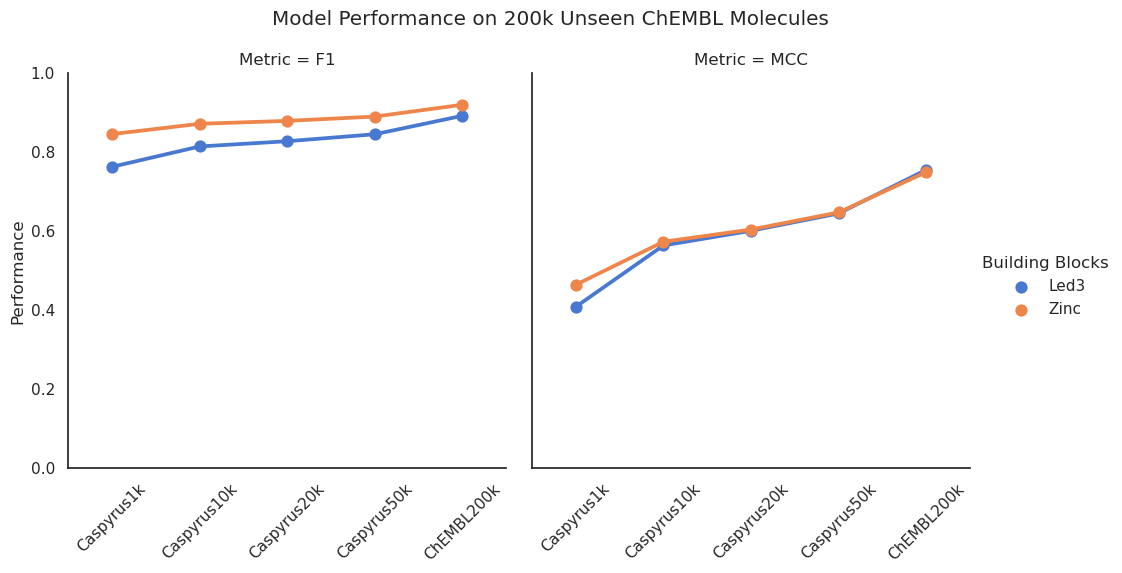

In [14]:
# replace chembl_test_f1 with F1 and chembl_test_mcc with MCC
chembl_test_results_melted["Metric"] = chembl_test_results_melted["Metric"].str.replace("chembl_test_f1", "F1")
chembl_test_results_melted["Metric"] = chembl_test_results_melted["Metric"].str.replace("chembl_test_mcc", "MCC")

# visualize with a line plot and not a bar plot

sns.set_theme(style="white")

ax = sns.catplot(x="Dataset", y="Value", hue="Building Blocks", palette = palette, data=chembl_test_results_melted, kind = "point", col="Metric", sharey=True, sharex=True)

# y axis from 0 to 1
ax.set(ylim=(0, 1))

# rotate the x axis labels
ax.set_xticklabels(rotation=45)

# rename the y axis label
ax.set_axis_labels("", "Performance")

# set the title
ax.fig.suptitle('Model Performance on 200k Unseen ChEMBL Molecules', y=1.05)

### joined

Rectangle(xy=(-0, -0), width=22, height=7.7, angle=0)


<PATH>/conda/envs/led3_score/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.10980392156862745, 0.4980392156862745)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
<PATH>/conda/envs/led3_score/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6941176470588235, 0.25098039215686274, 0.050980392156862744)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
<PATH>/conda/envs/led3_score/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.10980392156862745, 0.4980392156862745)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor

Text(0.5, -0.125, 'Training Dataset')

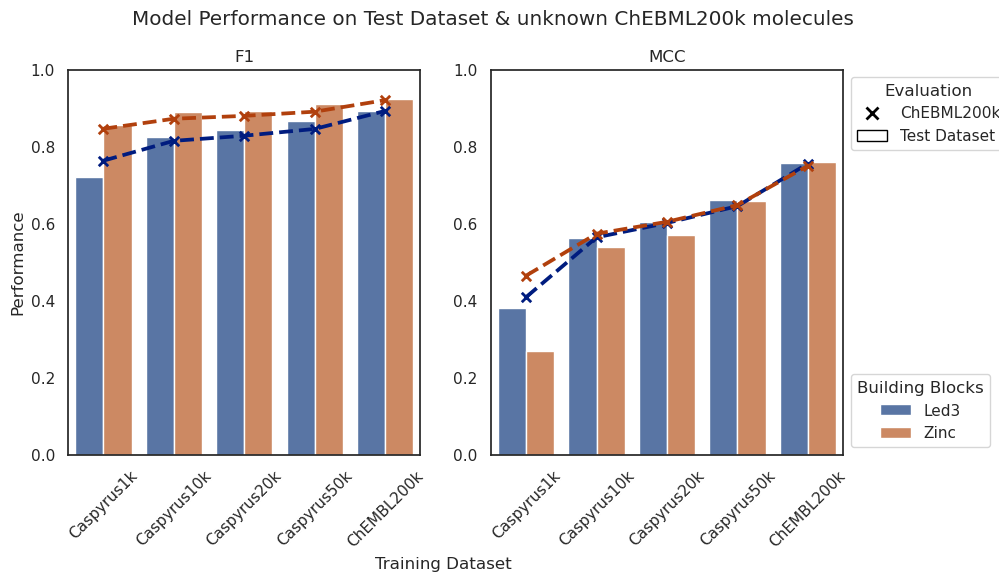

In [15]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(ncols=2, nrows=1, sharey=False, sharex=True, figsize=(10,5))

sns.set_theme(style="white")

with sns.axes_style("white"):
    ax = sns.barplot(x="Dataset", y="Value", hue="Building Blocks", data=test_results_melted[test_results_melted["Metric"] == "F1"], ax=axs[0])
    ax = sns.barplot(x="Dataset", y="Value", hue="Building Blocks", data=test_results_melted[test_results_melted["Metric"] == "MCC"], ax=axs[1])

    sns.pointplot(x="Dataset", y="Value", hue="Building Blocks", data=chembl_test_results_melted[chembl_test_results_melted["Metric"] == "F1"], ax=axs[0], palette="dark", markers="x", linestyles="--")
    sns.pointplot(x="Dataset", y="Value", hue="Building Blocks", data=chembl_test_results_melted[chembl_test_results_melted["Metric"] == "MCC"], ax=axs[1], palette="dark", markers="x", linestyles="--")

# y axis from 0 to 1
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))

# rotate the x axis labels
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation=45)

# rename the y axis label
axs[0].set(xlabel='', ylabel='Performance')
axs[1].set(xlabel='', ylabel='')

# set the title
axs[0].set_title('F1')
axs[1].set_title('MCC')

# no legend
axs[0].legend([],[], frameon=False)

h,l = axs[1].get_legend_handles_labels()

hx = Line2D([], [], marker='x', color='black', linestyle='None', markersize=8, markeredgewidth=2)

l1 = axs[1].legend((hx,h[2]),["ChEBML200k", "Test Dataset"], loc='upper left', bbox_to_anchor=(1.0, 1), title="Evaluation")
l2 = axs[1].legend(h[int(len(h)/2):],l[int(len(l)/2):], loc='lower left', bbox_to_anchor=(1.0, 0.), title="Building Blocks")

for lh in l1.get_patches(): 
    print(lh)
    lh.set_color('white')
    lh.set_edgecolor('black')


axs[1].add_artist(l1) # we need this because the 2nd call to legend() erases the first

# set overall title
fig.suptitle('Model Performance on Test Dataset & unknown ChEBML200k molecules', y=1.0, x=0.55)

# set overall x axis label
fig.text(0.5, -0.125, 'Training Dataset', ha='center', va='bottom')

<PATH>/conda/envs/led3_score/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.10980392156862745, 0.4980392156862745)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
<PATH>/conda/envs/led3_score/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.6941176470588235, 0.25098039215686274, 0.050980392156862744)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
<PATH>/conda/envs/led3_score/lib/python3.9/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.10980392156862745, 0.4980392156862745)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor

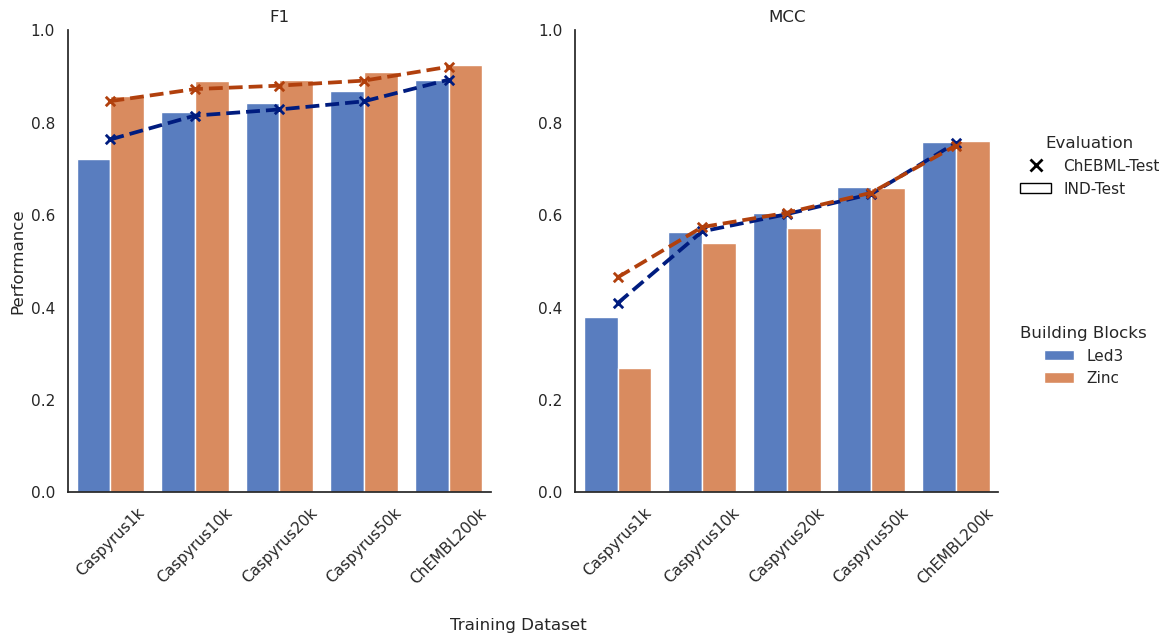

In [16]:
# chatgpt improvements lol

from matplotlib.lines import Line2D

fig, axs = plt.subplots(ncols=2, nrows=1, sharey=False, sharex=True, figsize=(12, 6))

sns.set_theme(style="white")
palette = sns.color_palette("muted", n_colors=2)

with sns.axes_style("white"):
    ax = sns.barplot(
        x="Dataset",
        y="Value",
        hue="Building Blocks",
        palette="muted",
        data=test_results_melted[test_results_melted["Metric"] == "F1"],
        ax=axs[0],
        edgecolor=None,  # Remove bar borders
    )
    ax = sns.barplot(
        x="Dataset",
        y="Value",
        hue="Building Blocks",
        palette=palette,
        data=test_results_melted[test_results_melted["Metric"] == "MCC"],
        ax=axs[1],
        edgecolor=None,  # Remove bar borders
    )

    sns.pointplot(
        x="Dataset",
        y="Value",
        hue="Building Blocks",
        data=chembl_test_results_melted[chembl_test_results_melted["Metric"] == "F1"],
        ax=axs[0],
        palette="dark",
        markers="x",
        linestyles="--",
    )
    sns.pointplot(
        x="Dataset",
        y="Value",
        hue="Building Blocks",
        data=chembl_test_results_melted[chembl_test_results_melted["Metric"] == "MCC"],
        ax=axs[1],
        palette="dark",
        markers="x",
        linestyles="--",
    )

# y axis from 0 to 1
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))

# rotate the x axis labels
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# rename the y axis label
axs[0].set(xlabel="", ylabel="Performance")
axs[1].set(xlabel="", ylabel="")

# set the title
axs[0].set_title("F1")
axs[1].set_title("MCC")

# no legend border
axs[0].legend([], [], frameon=False)
axs[1].legend([], [], frameon=False)

h, l = axs[1].get_legend_handles_labels()

hx = Line2D([], [], marker="x", color="black", linestyle="None", markersize=8, markeredgewidth=2)

l1 = axs[1].legend(
    (hx, h[2]), ["ChEBML-Test", "IND-Test"], loc="upper left", bbox_to_anchor=(1.02, 0.8), title="Evaluation", frameon=False
)
l2 = axs[1].legend(h[int(len(h) / 2):], l[int(len(l) / 2):], loc="lower left", bbox_to_anchor=(1.02, 0.2), title="Building Blocks", frameon=False)

for lh in l1.get_patches():
    lh.set_color("white")
    lh.set_edgecolor("black")

axs[1].add_artist(l1)  # we need this because the 2nd call to legend() erases the first

# set overall title
#fig.suptitle("Model Performance on Test Dataset & unknown ChEBML200k molecules", y=1.0, x=0.55)

# set overall x axis label
fig.text(0.5, -0.125, "Training Dataset", ha="center", va="bottom")

# Remove borders around the plot
sns.despine()

plt.savefig("./pdfs/experiment_2_synthesizability_score_new.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_2_synthesizability_score_new.svg", bbox_inches='tight', format="svg")
# Show the plot
plt.show()

# Experiment 3: Molecular Generation with Synthesizability Score

### QSAR

In [1]:
qsar_scaffold_split = "<PATH>/led3_score/data/results/3_molecular_generation/qsar/LED3_tables - QSAR_models_summary_scaffoldsplit.csv"
qsar_time_split = "<PATH>/led3_score/data/results/3_molecular_generation/qsar/LED3_tables - QSAR_models_summary_timesplit.csv"

import pandas

qsar_scaffold_split = pandas.read_csv(qsar_scaffold_split)
qsar_time_split = pandas.read_csv(qsar_time_split)

qsar_scaffold_split.head()

,Metric,Model,TestSet,Value
0,f1_score,RandomForestClassifier,CV1,0.877193
1,matthews_corrcoef,RandomForestClassifier,CV1,0.750479
2,precision_score,RandomForestClassifier,CV1,0.862069
3,recall_score,RandomForestClassifier,CV1,0.892857
4,accuracy_score,RandomForestClassifier,CV1,0.875000


In [2]:
qsar_scaffold_split

,Metric,Model,TestSet,Value
0,f1_score,RandomForestClassifier,CV1,0.877193
1,matthews_corrcoef,RandomForestClassifier,CV1,0.750479
2,precision_score,RandomForestClassifier,CV1,0.862069
3,recall_score,RandomForestClassifier,CV1,0.892857
4,accuracy_score,RandomForestClassifier,CV1,0.875000
...,...,...,...,...
265,f1_score,GaussianNB,IND,0.385965
266,matthews_corrcoef,GaussianNB,IND,0.367362
267,precision_score,GaussianNB,IND,0.846154
268,recall_score,GaussianNB,IND,0.250000


#### f1

In [4]:
# Rename all "CV*" to "CV"
qsar_scaffold_split['TestSet'] = qsar_scaffold_split['TestSet'].str.replace(r'CV\d+', 'CV')

# Separate IND and CV test sets and filter for f1_score
qsar_scaffold_split_f1 = qsar_scaffold_split[qsar_scaffold_split['Metric'] == 'f1_score']
qsar_scaffold_split_f1['Split'] = "Scaffold"
# Rename all "CV*" to "CV"
qsar_time_split['TestSet'] = qsar_time_split['TestSet'].str.replace(r'CV\d+', 'CV')

# Separate IND and CV test sets and filter for f1_score
qsar_time_split_f1 = qsar_time_split[qsar_time_split['Metric'] == 'f1_score']
qsar_time_split_f1['Split'] = "Time"

qsar_results_joined = pandas.concat([qsar_scaffold_split_f1, qsar_time_split_f1])
qsar_results_joined

/tmp/ipykernel_348305/1200916048.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qsar_scaffold_split['TestSet'] = qsar_scaffold_split['TestSet'].str.replace(r'CV\d+', 'CV')
/tmp/ipykernel_348305/1200916048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qsar_scaffold_split_f1['Split'] = "Scaffold"
/tmp/ipykernel_348305/1200916048.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  qsar_time_split['TestSet'] = qsar_time_split['TestSet'].str.replace(r'CV\d+', 'CV')
/tmp/ipykernel_348305/1200916048.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Metric,Model,TestSet,Value,Split
0,f1_score,RandomForestClassifier,CV,0.877193,Scaffold
5,f1_score,RandomForestClassifier,CV,0.896000,Scaffold
10,f1_score,RandomForestClassifier,CV,0.904348,Scaffold
15,f1_score,RandomForestClassifier,CV,0.875000,Scaffold
20,f1_score,RandomForestClassifier,CV,0.783505,Scaffold
...,...,...,...,...,...
245,f1_score,GaussianNB,CV,0.787234,Time
250,f1_score,GaussianNB,CV,0.769231,Time
255,f1_score,GaussianNB,CV,0.888889,Time
260,f1_score,GaussianNB,CV,0.800000,Time


In [5]:
# Separate IND and CV test sets and filter for f1_score
qsar_results_joined_cv = qsar_results_joined[qsar_results_joined['TestSet'] == 'CV']
qsar_results_joined_cv

,Metric,Model,TestSet,Value,Split
0,f1_score,RandomForestClassifier,CV,0.877193,Scaffold
5,f1_score,RandomForestClassifier,CV,0.896000,Scaffold
10,f1_score,RandomForestClassifier,CV,0.904348,Scaffold
15,f1_score,RandomForestClassifier,CV,0.875000,Scaffold
20,f1_score,RandomForestClassifier,CV,0.783505,Scaffold
...,...,...,...,...,...
240,f1_score,GaussianNB,CV,0.843137,Time
245,f1_score,GaussianNB,CV,0.787234,Time
250,f1_score,GaussianNB,CV,0.769231,Time
255,f1_score,GaussianNB,CV,0.888889,Time


In [6]:
qsar_results_joined_ind = qsar_results_joined[qsar_results_joined['TestSet'] == 'IND']
qsar_results_joined_ind

,Metric,Model,TestSet,Value,Split
25,f1_score,RandomForestClassifier,IND,0.500000,Scaffold
55,f1_score,ExtraTreesClassifier,IND,0.448276,Scaffold
85,f1_score,XGBClassifier,IND,0.594595,Scaffold
115,f1_score,MLPClassifier,IND,0.530120,Scaffold
145,f1_score,GradientBoostingClassifier,IND,0.540541,Scaffold
175,f1_score,AdaBoostClassifier,IND,0.551020,Scaffold
205,f1_score,KNeighborsClassifier,IND,0.533333,Scaffold
235,f1_score,SVC,IND,0.500000,Scaffold
265,f1_score,GaussianNB,IND,0.385965,Scaffold
25,f1_score,RandomForestClassifier,IND,0.609929,Time


In [16]:
import seaborn as sns
# seaborn palette muted with 2 colors
palette = sns.color_palette("muted")
palette


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [28]:
selected_palette = [palette[0], palette[9]]
# show the palette colors 8 and 9 as colors
dark_palette = sns.color_palette("dark")
selected_dark_palette = [dark_palette[0], dark_palette[9]]

/tmp/ipykernel_348305/3662801333.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qsar_results_joined_cv['Split'] = qsar_results_joined_cv['Split'].replace({'Time': 'Time CV', 'Scaffold': 'Scaffold CV'})


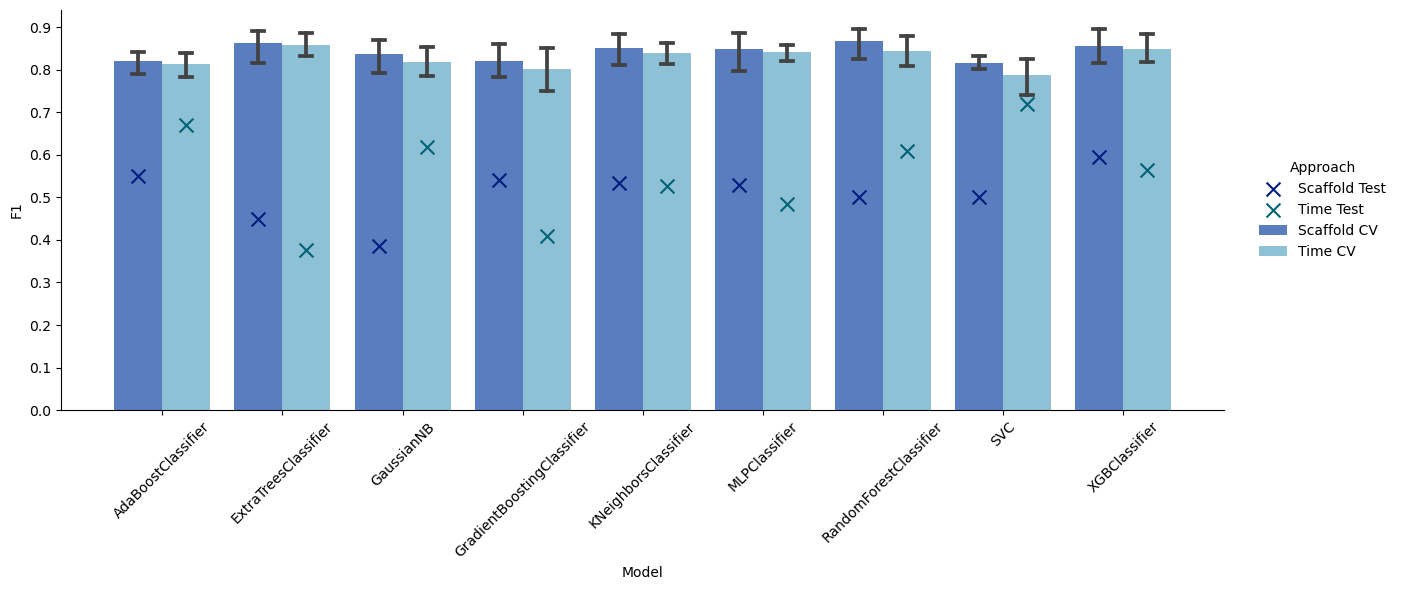

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming qsar_results_joined_cv and qsar_results_joined_ind are your dataframes

# Determine the desired order of the x-axis categories
sorted_models = sorted(qsar_results_joined_cv['Model'].unique())

qsar_results_joined_cv['Split'] = qsar_results_joined_cv['Split'].replace({'Time': 'Time CV', 'Scaffold': 'Scaffold CV'})

# Create the bar plot with the specified order
plt.figure(figsize=(14, 6))
sns.barplot(data=qsar_results_joined_cv, x='Model', y='Value', hue='Split', order=sorted_models, capsize=0.1, palette = selected_palette)


# Reorder the independent results to match the order of sorted_models
ind_results_time = [qsar_results_joined_ind[(qsar_results_joined_ind['Model'] == model) & (qsar_results_joined_ind['Split'] == 'Time')]['Value'].values[0] for model in sorted_models]
ind_results_scaffold = [qsar_results_joined_ind[(qsar_results_joined_ind['Model'] == model) & (qsar_results_joined_ind['Split'] == 'Scaffold')]['Value'].values[0] for model in sorted_models]


# Determine the x-coordinates for each model
x_coords = np.arange(len(sorted_models))

x_coords_scaffold = x_coords - 0.2  # adjust this value as needed
plt.scatter(x_coords_scaffold, ind_results_scaffold, marker='x', color=selected_dark_palette[0], s=100, label='Scaffold Test')

# Overlay the independent results using "x" markers
x_coords_time = x_coords + 0.2  # adjust this value as needed
plt.scatter(x_coords_time, ind_results_time, marker='x', color=selected_dark_palette[1], s=100, label='Time Test')

#plt.title('QSAR model performance measured by cross-validation and test set')
plt.xticks(rotation=45)

plt.ylabel('F1')  # Set y-axis label to "F1"

# Adjust x-axis ticks to be spaced every 0.1
plt.yticks(np.arange(0, 1.0, 0.1))

# Move the legend to the top right corner
legend = plt.legend(title="Approach", loc='center right', bbox_to_anchor=(1.15, 0.5))
legend.get_frame().set_edgecolor('none')  # Remove legend border

sns.despine(left=False, bottom=False)

plt.tight_layout()

plt.savefig("./pdfs/experiment_3_QSAR_MODEL_F1.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_QSAR_MODEL_F1.svg", bbox_inches='tight', format="svg")

plt.show()

#### MCC


In [128]:
# Rename all "CV*" to "CV"
qsar_scaffold_split['TestSet'] = qsar_scaffold_split['TestSet'].str.replace(r'CV\d+', 'CV')

# Separate IND and CV test sets and filter for f1_score
qsar_scaffold_split_mcc = qsar_scaffold_split[qsar_scaffold_split['Metric'] == 'matthews_corrcoef']
qsar_scaffold_split_mcc['Split'] = "Scaffold"
# Rename all "CV*" to "CV"
qsar_time_split['TestSet'] = qsar_time_split['TestSet'].str.replace(r'CV\d+', 'CV')

# Separate IND and CV test sets and filter for f1_score
qsar_time_split_mcc = qsar_time_split[qsar_time_split['Metric'] == 'matthews_corrcoef']
qsar_time_split_mcc['Split'] = "Time"

qsar_results_joined = pd.concat([qsar_scaffold_split_mcc, qsar_time_split_mcc])
# Separate IND and CV test sets 
qsar_results_joined_cv = qsar_results_joined[qsar_results_joined['TestSet'] == 'CV']
qsar_results_joined_ind = qsar_results_joined[qsar_results_joined['TestSet'] == 'IND']

/tmp/ipykernel_139836/2017419951.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qsar_scaffold_split['TestSet'] = qsar_scaffold_split['TestSet'].str.replace(r'CV\d+', 'CV')
/tmp/ipykernel_139836/2017419951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qsar_scaffold_split_mcc['Split'] = "Scaffold"
/tmp/ipykernel_139836/2017419951.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  qsar_time_split['TestSet'] = qsar_time_split['TestSet'].str.replace(r'CV\d+', 'CV')
/tmp/ipykernel_139836/2017419951.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

/tmp/ipykernel_139836/4247378181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qsar_results_joined_cv['Split'] = qsar_results_joined_cv['Split'].replace({'Time': 'Time CV', 'Scaffold': 'Scaffold CV'})


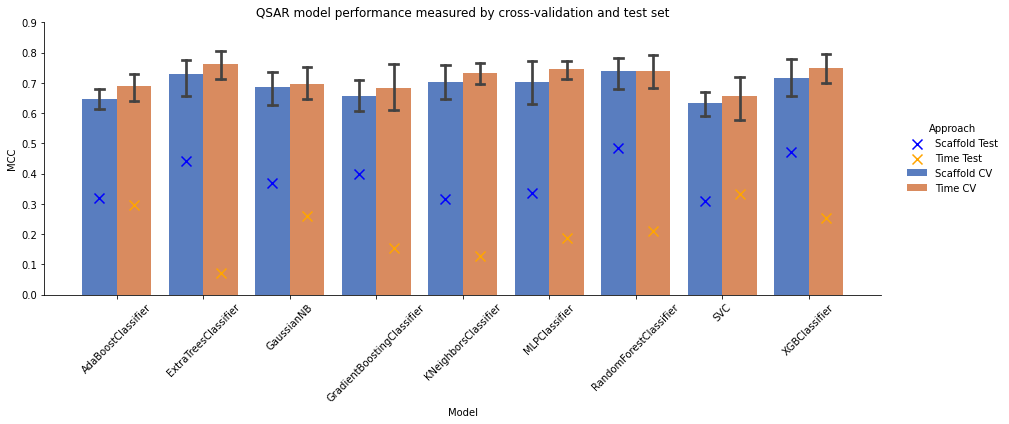

In [129]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming qsar_results_joined_cv and qsar_results_joined_ind are your dataframes

# Determine the desired order of the x-axis categories
sorted_models = sorted(qsar_results_joined_cv['Model'].unique())

qsar_results_joined_cv['Split'] = qsar_results_joined_cv['Split'].replace({'Time': 'Time CV', 'Scaffold': 'Scaffold CV'})

# Create the bar plot with the specified order
plt.figure(figsize=(14, 6))
sns.barplot(data=qsar_results_joined_cv, x='Model', y='Value', hue='Split', order=sorted_models, capsize=0.1, palette = "muted")


# Reorder the independent results to match the order of sorted_models
ind_results_time = [qsar_results_joined_ind[(qsar_results_joined_ind['Model'] == model) & (qsar_results_joined_ind['Split'] == 'Time')]['Value'].values[0] for model in sorted_models]
ind_results_scaffold = [qsar_results_joined_ind[(qsar_results_joined_ind['Model'] == model) & (qsar_results_joined_ind['Split'] == 'Scaffold')]['Value'].values[0] for model in sorted_models]


# Determine the x-coordinates for each model
x_coords = np.arange(len(sorted_models))

x_coords_scaffold = x_coords - 0.2  # adjust this value as needed
plt.scatter(x_coords_scaffold, ind_results_scaffold, marker='x', color='blue', s=100, label='Scaffold Test')

# Overlay the independent results using "x" markers
x_coords_time = x_coords + 0.2  # adjust this value as needed
plt.scatter(x_coords_time, ind_results_time, marker='x', color='orange', s=100, label='Time Test')

plt.title('QSAR model performance measured by cross-validation and test set')
plt.xticks(rotation=45)

plt.ylabel('MCC')  # Set y-axis label to "F1"

# Adjust x-axis ticks to be spaced every 0.1
plt.yticks(np.arange(0, 1.0, 0.1))

# Move the legend to the top right corner
legend = plt.legend(title="Approach", loc='center right', bbox_to_anchor=(1.15, 0.5))
legend.get_frame().set_edgecolor('none')  # Remove legend border

sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

### Molecular Generation Scores

In [1]:
import pandas

In [2]:
led3_building_blocks = {'Score': ["QSAR Only", "SaScore", "Led3_Caspyrus10k", "Led3_ChEBML200k", "Zinc_Caspyrus10k", "Zinc_ChEBML200k"], 'Solved': [1468, 58052, 35697, 30650, 35102, 43655], 'Solved & Active': [762, 2447, 25044, 22202, 24912, 24109]}
led3_building_blocks = pandas.DataFrame.from_dict(led3_building_blocks, orient='columns')
led3_building_blocks["Building Blocks"] = "Led3"
led3_building_blocks

,Score,Solved,Solved & Active,Building Blocks
0,QSAR Only,1468,762,Led3
1,SaScore,58052,2447,Led3
2,Led3_Caspyrus10k,35697,25044,Led3
3,Led3_ChEBML200k,30650,22202,Led3
4,Zinc_Caspyrus10k,35102,24912,Led3
5,Zinc_ChEBML200k,43655,24109,Led3


In [3]:
zinc_building_blocks = {'Score': ["QSAR Only", "SaScore", "Led3_Caspyrus10k", "Led3_ChEBML200k", "Zinc_Caspyrus10k", "Zinc_ChEBML200k"], 'Solved': [1635, 62452, 42564, 30765, 35084, 48078], 'Solved & Active': [883, 2851, 30071, 21732, 24575, 26554]}
zinc_building_blocks = pandas.DataFrame.from_dict(zinc_building_blocks, orient='columns')
zinc_building_blocks["Building Blocks"] = "Zinc"
zinc_building_blocks

,Score,Solved,Solved & Active,Building Blocks
0,QSAR Only,1635,883,Zinc
1,SaScore,62452,2851,Zinc
2,Led3_Caspyrus10k,42564,30071,Zinc
3,Led3_ChEBML200k,30765,21732,Zinc
4,Zinc_Caspyrus10k,35084,24575,Zinc
5,Zinc_ChEBML200k,48078,26554,Zinc


In [4]:
# join the two dataframes
joined_building_blocks = pandas.concat([led3_building_blocks, zinc_building_blocks])
joined_building_blocks

,Score,Solved,Solved & Active,Building Blocks
0,QSAR Only,1468,762,Led3
1,SaScore,58052,2447,Led3
2,Led3_Caspyrus10k,35697,25044,Led3
3,Led3_ChEBML200k,30650,22202,Led3
4,Zinc_Caspyrus10k,35102,24912,Led3
5,Zinc_ChEBML200k,43655,24109,Led3
0,QSAR Only,1635,883,Zinc
1,SaScore,62452,2851,Zinc
2,Led3_Caspyrus10k,42564,30071,Zinc
3,Led3_ChEBML200k,30765,21732,Zinc


In [5]:
# melt the dataframe
joined_building_blocks = pandas.melt(joined_building_blocks, id_vars=["Score", "Building Blocks"], value_vars=["Solved", "Solved & Active"], var_name="Metric", value_name="Value")
joined_building_blocks

,Score,Building Blocks,Metric,Value
0,QSAR Only,Led3,Solved,1468
1,SaScore,Led3,Solved,58052
2,Led3_Caspyrus10k,Led3,Solved,35697
3,Led3_ChEBML200k,Led3,Solved,30650
4,Zinc_Caspyrus10k,Led3,Solved,35102
5,Zinc_ChEBML200k,Led3,Solved,43655
6,QSAR Only,Zinc,Solved,1635
7,SaScore,Zinc,Solved,62452
8,Led3_Caspyrus10k,Zinc,Solved,42564
9,Led3_ChEBML200k,Zinc,Solved,30765


In [6]:
# rename Score to Model and Metric to Count
joined_building_blocks = joined_building_blocks.rename(columns={"Score": "Synthesizability Score"})
joined_building_blocks

,Synthesizability Score,Building Blocks,Metric,Value
0,QSAR Only,Led3,Solved,1468
1,SaScore,Led3,Solved,58052
2,Led3_Caspyrus10k,Led3,Solved,35697
3,Led3_ChEBML200k,Led3,Solved,30650
4,Zinc_Caspyrus10k,Led3,Solved,35102
5,Zinc_ChEBML200k,Led3,Solved,43655
6,QSAR Only,Zinc,Solved,1635
7,SaScore,Zinc,Solved,62452
8,Led3_Caspyrus10k,Zinc,Solved,42564
9,Led3_ChEBML200k,Zinc,Solved,30765


In [7]:
import seaborn as sns

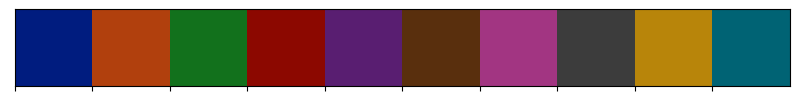

In [8]:
palette_deep = sns.color_palette("dark", 10)
sns.palplot(palette_deep)

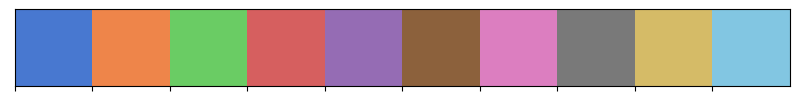

In [9]:
palette_muted = sns.color_palette("muted", 10)
sns.palplot(palette_muted)

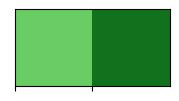

In [10]:
palette = sns.color_palette([palette_muted[2], palette_deep[2]])
sns.palplot(palette)

<Figure size 1200x600 with 0 Axes>

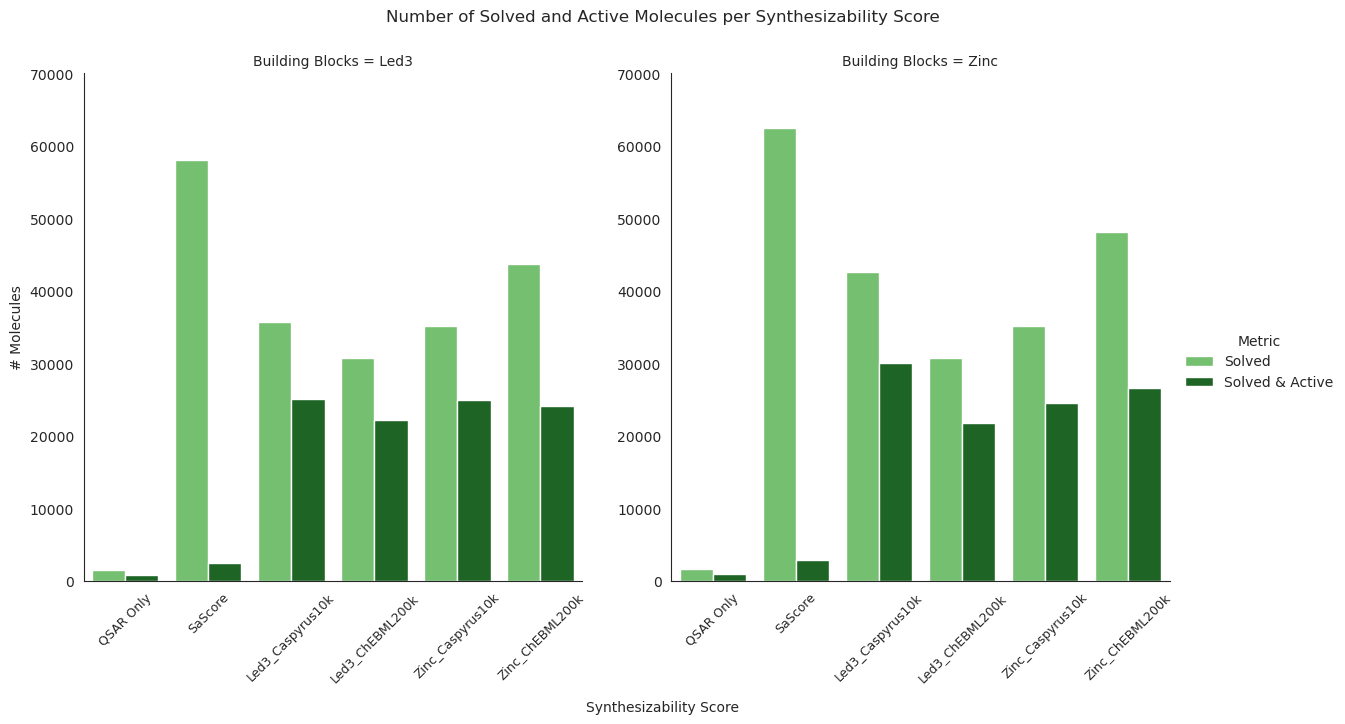

In [12]:
#chatgpt version with the right size

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white", {'legend.frameon': True})

plt.figure(figsize=(12, 6))  # Set the figure size

# plot with seaborn barplot
ax = sns.catplot(
    x="Synthesizability Score",
    y="Value",
    hue="Metric",
    data=joined_building_blocks,
    kind="bar",
    col="Building Blocks",
    sharey=False,
    sharex=True,
    palette=palette,
    height=6,
    aspect=1
)

# y axis from 0 to 70000
ax.set(ylim=(0, 70000))

# rename the y axis label
ax.set_axis_labels("", "# Molecules")

for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, fontsize=9)

# set overall x axis label
ax.fig.text(0.5, -0.125, 'Synthesizability Score', ha='center', va='bottom')

# Set the overall title
ax.fig.suptitle('Number of Solved and Active Molecules per Synthesizability Score', y=1.05)

#plt.savefig("./pdfs/experiment_3_denovo_design.pdf", bbox_inches='tight')
#plt.savefig("./svgs/experiment_3_denovo_design.svg", bbox_inches='tight', format="svg")
# Show the plot
plt.show()

## new

In [13]:
new_joined_building_blocks = joined_building_blocks.copy()
new_joined_building_blocks

,Synthesizability Score,Building Blocks,Metric,Value
0,QSAR Only,Led3,Solved,1468
1,SaScore,Led3,Solved,58052
2,Led3_Caspyrus10k,Led3,Solved,35697
3,Led3_ChEBML200k,Led3,Solved,30650
4,Zinc_Caspyrus10k,Led3,Solved,35102
5,Zinc_ChEBML200k,Led3,Solved,43655
6,QSAR Only,Zinc,Solved,1635
7,SaScore,Zinc,Solved,62452
8,Led3_Caspyrus10k,Zinc,Solved,42564
9,Led3_ChEBML200k,Zinc,Solved,30765


In [14]:
new_joined_building_blocks["Synthesizability Score"] = new_joined_building_blocks["Synthesizability Score"].replace("Led3_Caspyrus10k", "Led3-Caspyrus10k")
new_joined_building_blocks["Synthesizability Score"] = new_joined_building_blocks["Synthesizability Score"].replace("Led3_ChEBML200k", "Led3-ChEBML200k")
new_joined_building_blocks["Synthesizability Score"] = new_joined_building_blocks["Synthesizability Score"].replace("Zinc_Caspyrus10k", "Zinc-Caspyrus10k")
new_joined_building_blocks["Synthesizability Score"] = new_joined_building_blocks["Synthesizability Score"].replace("Zinc_ChEBML200k", "Zinc-ChEBML200k")
new_joined_building_blocks["Synthesizability Score"] = new_joined_building_blocks["Synthesizability Score"].replace("SaScore", "SAScore")
new_joined_building_blocks


,Synthesizability Score,Building Blocks,Metric,Value
0,QSAR Only,Led3,Solved,1468
1,SAScore,Led3,Solved,58052
2,Led3-Caspyrus10k,Led3,Solved,35697
3,Led3-ChEBML200k,Led3,Solved,30650
4,Zinc-Caspyrus10k,Led3,Solved,35102
5,Zinc-ChEBML200k,Led3,Solved,43655
6,QSAR Only,Zinc,Solved,1635
7,SAScore,Zinc,Solved,62452
8,Led3-Caspyrus10k,Zinc,Solved,42564
9,Led3-ChEBML200k,Zinc,Solved,30765


In [15]:

# Example custom order for 'Synthesizability Score'
custom_order = ['QSAR Only', 'SAScore', 'Led3-Caspyrus10k', 'Zinc-Caspyrus10k', 'Led3-ChEBML200k', 	'Zinc-ChEBML200k']  # Replace with your actual scores

# Create a mapping dictionary for the custom order
order_dict = {score: i for i, score in enumerate(custom_order)}

# Add a new column 'SortOrder' to the DataFrame based on the custom order
new_joined_building_blocks['SortOrder'] = new_joined_building_blocks['Synthesizability Score'].map(order_dict)

# Sort the DataFrame based on the 'SortOrder' column
new_joined_building_blocks = new_joined_building_blocks.sort_values(by='SortOrder')
new_joined_building_blocks

,Synthesizability Score,Building Blocks,Metric,Value,SortOrder
0,QSAR Only,Led3,Solved,1468,0
12,QSAR Only,Led3,Solved & Active,762,0
18,QSAR Only,Zinc,Solved & Active,883,0
6,QSAR Only,Zinc,Solved,1635,0
13,SAScore,Led3,Solved & Active,2447,1
7,SAScore,Zinc,Solved,62452,1
19,SAScore,Zinc,Solved & Active,2851,1
1,SAScore,Led3,Solved,58052,1
8,Led3-Caspyrus10k,Zinc,Solved,42564,2
2,Led3-Caspyrus10k,Led3,Solved,35697,2


/tmp/ipykernel_7360/1801204885.py:13: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  ax = sns.histplot(
/tmp/ipykernel_7360/1801204885.py:28: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(


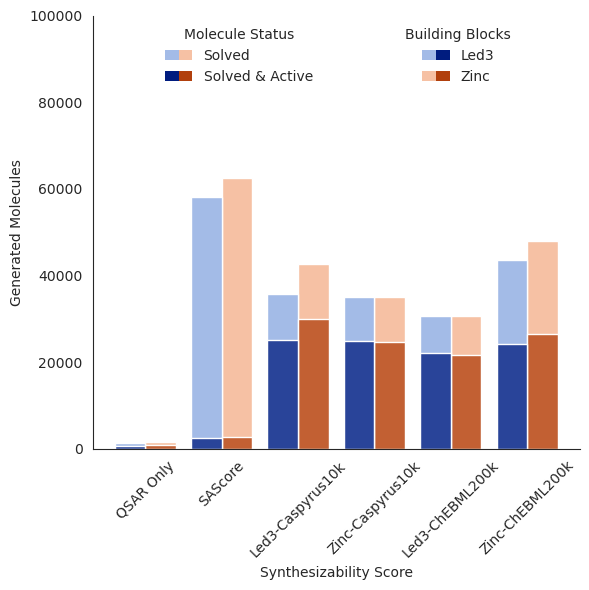

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

sns.set_style("white", {'legend.frameon': False})

# Create the figure
plt.figure(figsize=(6, 6))

# Plot "Solved" histogram with no fill (only edges colored)
ax = sns.histplot(
    data=new_joined_building_blocks[new_joined_building_blocks['Metric'] == 'Solved'],
    x='Synthesizability Score',
    hue='Building Blocks',
    weights='Value',
    label='Solved',
    palette=palette_muted,
    bins=len(new_joined_building_blocks['Synthesizability Score'].unique()),
    multiple='dodge',
    shrink=0.8,
    alpha=0.5,
    fill=True
)

# Plot "Solved & Active" histogram
sns.histplot(
    data=new_joined_building_blocks[new_joined_building_blocks['Metric'] == 'Solved & Active'],
    x='Synthesizability Score',
    hue='Building Blocks',
    weights='Value',
    label='Solved & Active',
    palette=palette_deep,
    bins=len(new_joined_building_blocks['Synthesizability Score'].unique()),
    multiple='dodge',
    shrink=0.8
)

# Create the first legend (Blue vs. Orange)

# Custom handler for "Building Blocks" legend
class Led3Handler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=palette_muted[0], edgecolor="none", alpha=0.5)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=palette_deep[0], edgecolor="none", alpha=1)
        return [patch1, patch2]

# Custom handler for "Molecule Status" legend
class ZincHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=palette_muted[1], edgecolor="none", alpha=0.5)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=palette_deep[1], edgecolor="none", alpha=1)
        return [patch1, patch2]

# Create the first legend (Building Blocks) with custom handler
led3_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='Led3')
zinc_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='Zinc')
first_legend = plt.legend(handles=[led3_patch, zinc_patch], title='Building Blocks', handler_map={led3_patch: Led3Handler(), zinc_patch: ZincHandler()}, loc='upper center', bbox_to_anchor=(0.75, 1), frameon=False)
#first_legend.get_title().set_fontweight('bold')
ax.add_artist(first_legend)

#blue_patch = mpatches.Patch(facecolor=palette_muted[0], label='Led3', edgecolor="none")
#orange_patch = mpatches.Patch(facecolor=palette_muted[1], label="Zinc", edgecolor="none")
#first_legend = ax.legend(handles=[blue_patch, orange_patch], title='Building Blocks', loc='upper center', bbox_to_anchor=(0.75, 1), frameon=False)
#first_legend.get_title().set_fontweight('bold')
#ax.add_artist(first_legend)

# Create the second legend (Muted vs. Deep)
# Custom handler for the legend
class SolvedHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=palette_muted[0], edgecolor="none", alpha=0.5)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=palette_muted[1], edgecolor="none", alpha=0.5)
        return [patch1, patch2]

# Corrected custom handler for "Solved & Active"
class SolvedActiveHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=palette_deep[0], edgecolor="none", alpha = 1)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=palette_deep[1], edgecolor="none", alpha = 1)
        return [patch1, patch2]

# Create the second legend (Molecule Status) with custom handler
solved_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='Solved')
solved_active_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='Solved & Active')
second_legend = plt.legend(handles=[solved_patch, solved_active_patch], title='Molecule Status', handler_map={solved_patch: SolvedHandler(), solved_active_patch: SolvedActiveHandler()}, loc='upper center', bbox_to_anchor=(0.3, 1), frameon=False)
#second_legend.get_title().set_fontweight('bold')


#muted_patch = mpatches.Patch(facecolor=palette_muted[0], label='Solved', alpha=0.5, edgecolor="none")
#deep_patch = mpatches.Patch(facecolor=palette_deep[0], label='Solved & Active', edgecolor="none")
#second_legend = plt.legend(handles=[muted_patch, deep_patch], title='Molecule Status', loc='upper center', bbox_to_anchor=(0.3, 1), frameon=False)
#second_legend.get_title().set_fontweight('bold')

# Set the y-axis limit, labels, and x-axis labels
plt.ylim(0, 100000)
plt.ylabel("Generated Molecules")

plt.xticks(rotation=45)

plt.xlabel('Synthesizability Score')

sns.despine(left=False, bottom=False)

plt.tight_layout()

plt.savefig("./pdfs/experiment_3_denovo_design_new_double_patch.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_denovo_design_new_double_patch.svg", bbox_inches='tight', format="svg")

plt.show()

### Out-of-Domain Performance

In [2]:
import pandas

In [3]:
out_of_domain = {'Score': ["Led3-Caspyrus10k", "Led3-ChEBML200k", "Zinc-Caspyrus10k", "Zinc-ChEBML200k"], 'Solved': [35697, 30650, 35084, 48078], 'Building Blocks': ["Led3", "Led3", "Zinc", "Zinc"], "F1": [0.6766458, 0.720401328, 0.57311992, 0.7587027], "MCC": [0.465332, 0.584701, 0.26320024, 0.48642373]}
out_of_domain = pandas.DataFrame.from_dict(out_of_domain, orient='columns')
out_of_domain

,Score,Solved,Building Blocks,F1,MCC
0,Led3-Caspyrus10k,35697,Led3,0.676646,0.465332
1,Led3-ChEBML200k,30650,Led3,0.720401,0.584701
2,Zinc-Caspyrus10k,35084,Zinc,0.573120,0.263200
3,Zinc-ChEBML200k,48078,Zinc,0.758703,0.486424


In [4]:
# melt the dataframe
out_of_domain = pandas.melt(out_of_domain, id_vars=["Score", "Building Blocks"], value_vars=["F1", "MCC"], var_name="Metric", value_name="Value")
out_of_domain

,Score,Building Blocks,Metric,Value
0,Led3-Caspyrus10k,Led3,F1,0.676646
1,Led3-ChEBML200k,Led3,F1,0.720401
2,Zinc-Caspyrus10k,Zinc,F1,0.573120
3,Zinc-ChEBML200k,Zinc,F1,0.758703
4,Led3-Caspyrus10k,Led3,MCC,0.465332
5,Led3-ChEBML200k,Led3,MCC,0.584701
6,Zinc-Caspyrus10k,Zinc,MCC,0.263200
7,Zinc-ChEBML200k,Zinc,MCC,0.486424


In [5]:
chembl200k_test = {'Score': ["Led3-Caspyrus10k", "Led3-ChEBML200k", "Zinc-Caspyrus10k", "Zinc-ChEBML200k"], 'Building Blocks': ["Led3", "Led3", "Zinc", "Zinc"], "F1": [0.814710,0.892422,0.872117,0.920416], "MCC": [0.564036,0.755627,0.573439,0.749848]}
chembl200k_test = pandas.DataFrame.from_dict(chembl200k_test, orient='columns')
chembl200k_test

,Score,Building Blocks,F1,MCC
0,Led3-Caspyrus10k,Led3,0.814710,0.564036
1,Led3-ChEBML200k,Led3,0.892422,0.755627
2,Zinc-Caspyrus10k,Zinc,0.872117,0.573439
3,Zinc-ChEBML200k,Zinc,0.920416,0.749848


In [6]:
# melt the dataframe
chembl200k_test = pandas.melt(chembl200k_test, id_vars=["Score", "Building Blocks"], value_vars=["F1", "MCC"], var_name="Metric", value_name="Value")
chembl200k_test

,Score,Building Blocks,Metric,Value
0,Led3-Caspyrus10k,Led3,F1,0.814710
1,Led3-ChEBML200k,Led3,F1,0.892422
2,Zinc-Caspyrus10k,Zinc,F1,0.872117
3,Zinc-ChEBML200k,Zinc,F1,0.920416
4,Led3-Caspyrus10k,Led3,MCC,0.564036
5,Led3-ChEBML200k,Led3,MCC,0.755627
6,Zinc-Caspyrus10k,Zinc,MCC,0.573439
7,Zinc-ChEBML200k,Zinc,MCC,0.749848


In [7]:
# rename Score to Model
out_of_domain = out_of_domain.rename(columns={"Score": "Synthesizability Score"})
out_of_domain["source"] = "out_of_domain"
chembl200k_test = chembl200k_test.rename(columns={"Score": "Synthesizability Score"})
chembl200k_test["source"] = "chembl200k_test"

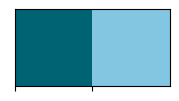

In [8]:
import seaborn as sns
palette_deep = sns.color_palette("dark", 10)
#sns.palplot(palette_deep)

palette_muted = sns.color_palette("muted", 10)
#sns.palplot(palette_muted)

metric_palette = sns.color_palette([palette_deep[9], palette_muted[9]])
sns.palplot(metric_palette)

Text(0.5, 1.05, 'Out-of-Distribution Model Performance on Generated Molecules')

<Figure size 1200x600 with 0 Axes>

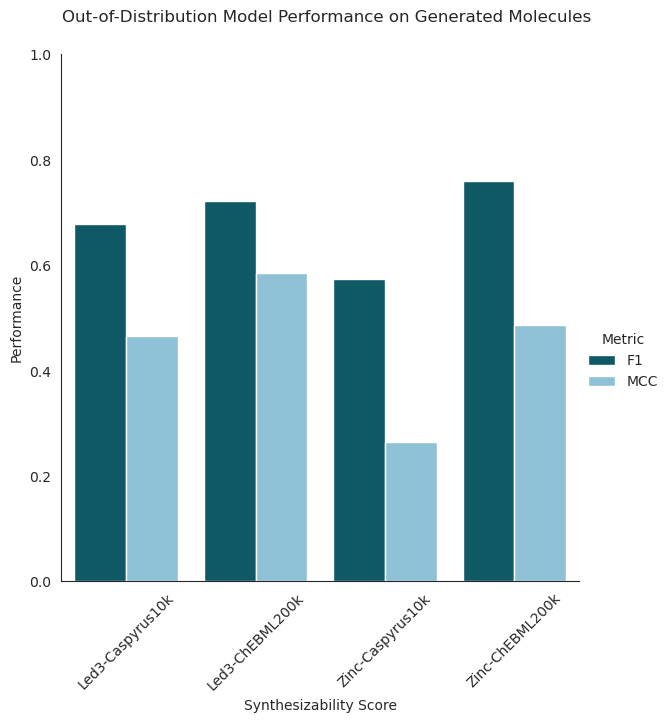

In [9]:
# plot with seaborn barplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="white")

plt.figure(figsize=(12, 6))  # Set the figure size

ax = sns.catplot(
    x="Synthesizability Score", 
    y="Value", 
    hue="Metric", 
    data=out_of_domain, 
    kind = "bar", 
    sharey=True, 
    sharex=True, 
    palette=metric_palette,
    height=6,
    aspect=1)

# y axis from 0 to 1
ax.set(ylim=(0, 1))

# rotate the x axis labels
ax.set_xticklabels(rotation=45)

# rename the y axis label
ax.set_axis_labels("Synthesizability Score", "Performance")

# set the title
ax.fig.suptitle('Out-of-Distribution Model Performance on Generated Molecules', y=1.05)

#plt.savefig("./pdfs/experiment_3_out_of_distribution.pdf", bbox_inches='tight')
#plt.savefig("./svgs/experiment_3_out_of_distribution.svg", bbox_inches='tight', format="svg")

In [10]:
# concat the two dataframes
joined = pandas.concat([out_of_domain, chembl200k_test])
joined

,Synthesizability Score,Building Blocks,Metric,Value,source
0,Led3-Caspyrus10k,Led3,F1,0.676646,out_of_domain
1,Led3-ChEBML200k,Led3,F1,0.720401,out_of_domain
2,Zinc-Caspyrus10k,Zinc,F1,0.573120,out_of_domain
3,Zinc-ChEBML200k,Zinc,F1,0.758703,out_of_domain
4,Led3-Caspyrus10k,Led3,MCC,0.465332,out_of_domain
5,Led3-ChEBML200k,Led3,MCC,0.584701,out_of_domain
6,Zinc-Caspyrus10k,Zinc,MCC,0.263200,out_of_domain
7,Zinc-ChEBML200k,Zinc,MCC,0.486424,out_of_domain
0,Led3-Caspyrus10k,Led3,F1,0.814710,chembl200k_test
1,Led3-ChEBML200k,Led3,F1,0.892422,chembl200k_test


In [11]:
pivot_df = joined.pivot_table(index=['Synthesizability Score', 'Building Blocks', 'Metric'], columns='source', values='Value', aggfunc='first')

# Subtract 'out_of_domain' from 'chembl200k_test'
pivot_df['Difference'] = pivot_df['chembl200k_test'] - pivot_df['out_of_domain']

# Reset the index if you want to have a DataFrame similar to the original structure but with the calculated differences
result_df = pivot_df.reset_index()[['Synthesizability Score', 'Building Blocks', 'Metric', 'Difference']]

print(result_df)

source Synthesizability Score Building Blocks Metric  Difference
0            Led3-Caspyrus10k            Led3     F1    0.138064
1            Led3-Caspyrus10k            Led3    MCC    0.098704
2             Led3-ChEBML200k            Led3     F1    0.172021
3             Led3-ChEBML200k            Led3    MCC    0.170926
4            Zinc-Caspyrus10k            Zinc     F1    0.298997
5            Zinc-Caspyrus10k            Zinc    MCC    0.310239
6             Zinc-ChEBML200k            Zinc     F1    0.161713
7             Zinc-ChEBML200k            Zinc    MCC    0.263424


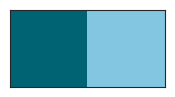

In [12]:
import seaborn as sns
palette_deep = sns.color_palette("dark", 10)
#sns.palplot(palette_deep)

palette_muted = sns.color_palette("muted", 10)
#sns.palplot(palette_muted)

metric_palette = sns.color_palette([palette_deep[9], palette_muted[9]])
sns.palplot(metric_palette)

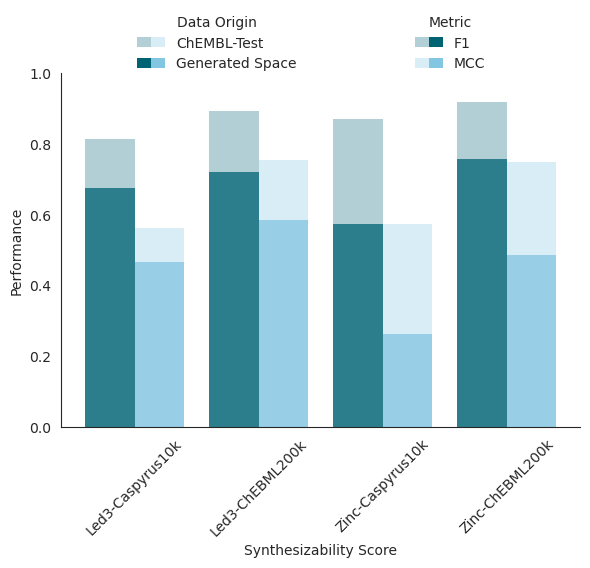

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase

sns.set_style("white", {'legend.frameon': False})

# Create the figure
plt.figure(figsize=(6, 6))

# Plot "Solved" histogram with no fill (only edges colored)
ax = sns.histplot(
    data=joined[joined['source'] == 'chembl200k_test'],
    x='Synthesizability Score',
    hue='Metric',
    weights='Value',
    label='ChEBML-Test',
    palette=metric_palette,
    bins=len(joined['Synthesizability Score'].unique()),
    multiple='dodge',
    shrink=0.8,
    alpha=0.3,
    fill=True,
    #edgecolor="black",
    linewidth=0.0
)

# Plot "Solved & Active" histogram
sns.histplot(
    data=joined[joined['source'] == 'out_of_domain'],
    x='Synthesizability Score',
    hue='Metric',
    weights='Value',
    label='Out of Domain',
    palette=metric_palette,
    bins=len(joined['Synthesizability Score'].unique()),
    multiple='dodge',
    shrink=0.8,
    #edgecolor="black",
    linewidth=0.0
)

# Custom handler for "Building Blocks" legend
class Led3Handler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=metric_palette[0], edgecolor="none", alpha=0.3)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=metric_palette[0], edgecolor="none", alpha=1)
        return [patch1, patch2]

# Custom handler for "Molecule Status" legend
class ZincHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=metric_palette[1], edgecolor="none", alpha=0.3)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=metric_palette[1], edgecolor="none", alpha=1)
        return [patch1, patch2]

# Create the first legend (Building Blocks) with custom handler
led3_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='F1')
zinc_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='MCC')
first_legend = plt.legend(handles=[led3_patch, zinc_patch], handler_map={led3_patch: Led3Handler(), zinc_patch: ZincHandler()}, title='Metric', loc='upper center', bbox_to_anchor=(0.75, 1.2), frameon=False)
#first_legend.get_title().set_fontweight('bold')
ax.add_artist(first_legend)

### new legends
#blue_patch = mpatches.Patch(facecolor=metric_palette[0], label='F1', edgecolor="none")
#orange_patch = mpatches.Patch(facecolor=metric_palette[1], label="MCC", edgecolor="none")
#first_legend = ax.legend(handles=[blue_patch, orange_patch], title='Metric', loc='upper center', bbox_to_anchor=(0.75, 1.2), frameon=False)
#first_legend.get_title().set_fontweight('bold')
#ax.add_artist(first_legend)

# Create the second legend (Muted vs. Deep)
# Custom handler for the legend
class SolvedHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=metric_palette[0], edgecolor="none", alpha=0.3)
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=metric_palette[1], edgecolor="none", alpha=0.3)
        return [patch1, patch2]

# Corrected custom handler for "Solved & Active"
class SolvedActiveHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        patch1 = mpatches.Rectangle([x0, y0], width / 2, height, facecolor=metric_palette[0], edgecolor="none")
        patch2 = mpatches.Rectangle([x0 + width / 2, y0], width / 2, height, facecolor=metric_palette[1], edgecolor="none")
        return [patch1, patch2]

# Create the second legend (Molecule Status) with custom handler
solved_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='ChEMBL-Test')
solved_active_patch = mpatches.Rectangle((0, 0), 1, 1, facecolor="none", edgecolor="none", label='Generated Space')
second_legend = plt.legend(handles=[solved_patch, solved_active_patch], title='Data Origin', handler_map={solved_patch: SolvedHandler(), solved_active_patch: SolvedActiveHandler()}, loc='upper center', bbox_to_anchor=(0.3, 1.2), frameon=False)
#second_legend.get_title().set_fontweight('bold')

## end new legends

# between 0 and 1
plt.ylim(0, 1.0)

#"Synthesizability Score", "Performance"
plt.ylabel("Performance")
plt.xticks(rotation=45)
plt.xlabel('Synthesizability Score')

sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.savefig("./pdfs/experiment_3_out_of_distribution_new_2.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_out_of_distribution_new_2.svg", bbox_inches='tight', format="svg")
plt.show()

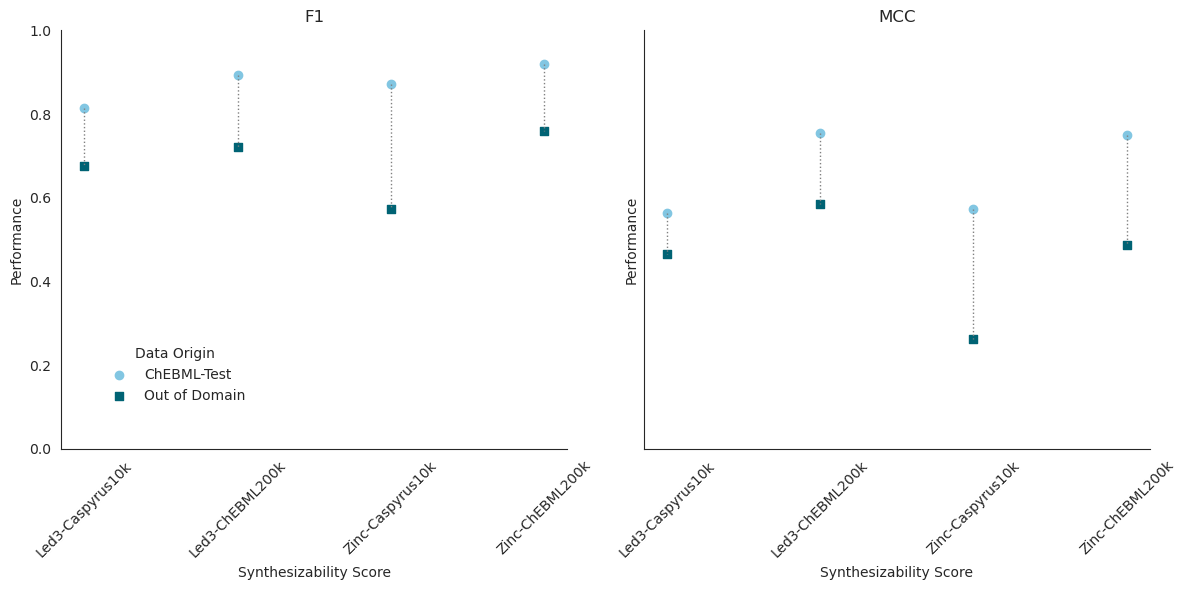

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_style("white", {'legend.frameon': False})

# Assuming `joined` DataFrame and `metric_palette` are defined earlier in your code
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

metrics = ['F1', 'MCC']
hue_order = ['chembl200k_test', 'out_of_domain']  # Define the order
custom_palette = {'chembl200k_test': metric_palette[1], 'out_of_domain': metric_palette[0]}  # Example palette

# Define different markers for each data origin
markers = {'chembl200k_test': 'o', 'out_of_domain': 's'}

for index, metric in enumerate(metrics):
    ax = axes[index]
    metric_data = joined[joined['Metric'] == metric]
    synthesizability_scores = metric_data['Synthesizability Score'].unique()
    
    for score in synthesizability_scores:
        score_data = metric_data[metric_data['Synthesizability Score'] == score]
        for source in hue_order:
            source_data = score_data[score_data['source'] == source]
            if not source_data.empty:
                ax.scatter([score]*len(source_data), source_data['Value'], label=source if score == synthesizability_scores[0] else "", color=custom_palette[source], marker=markers[source])
                
        # If both sources have data for this score, draw an arrow between them
        if len(score_data['source'].unique()) == len(hue_order):
            chembl_value = score_data[score_data['source'] == 'chembl200k_test']['Value'].values[0]
            out_of_domain_value = score_data[score_data['source'] == 'out_of_domain']['Value'].values[0]
            ax.plot([score, score], [chembl_value, out_of_domain_value], color='gray', linestyle='dotted', linewidth=1)
            
    ax.set_title(metric)
    ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1
    ax.set_ylabel("Performance")
    ax.set_xlabel('Synthesizability Score')
    ax.tick_params(axis='x', rotation=45)

# Adjust legend and layout
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:len(hue_order)], ['ChEBML-Test', 'Out of Domain'], loc='lower center', bbox_to_anchor=(0.15, 0.3), title='Data Origin', frameon=False)

sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

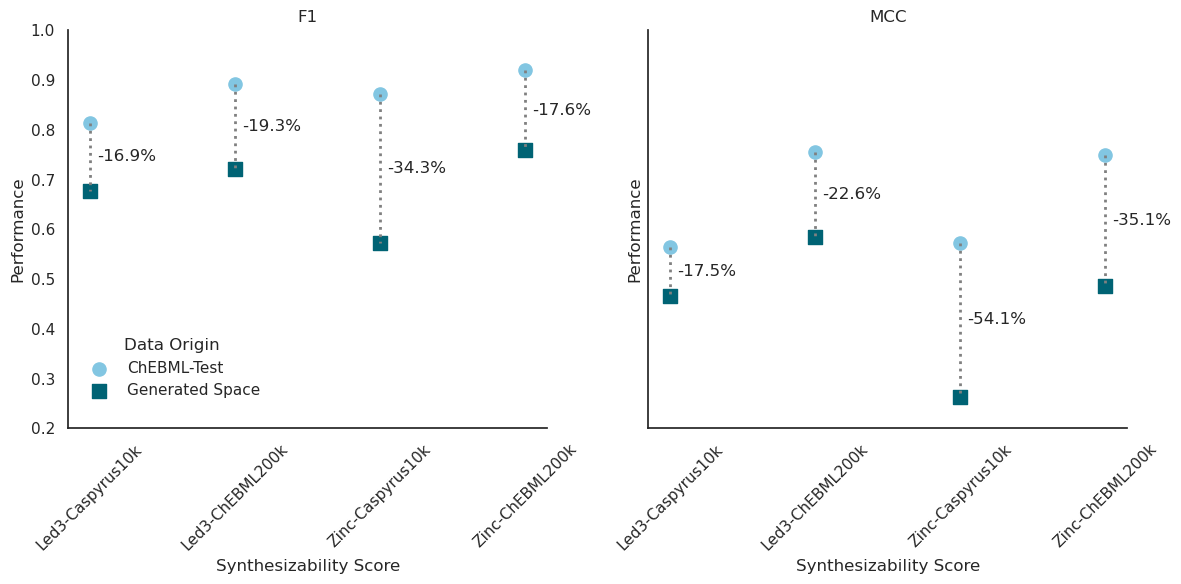

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_style("white", {'legend.frameon': False})
sns.set_context("notebook")
# Assuming `joined` DataFrame and `metric_palette` are defined earlier in your code
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

metrics = ['F1', 'MCC']
hue_order = ['chembl200k_test', 'out_of_domain']  # Define the order
custom_palette = {'chembl200k_test': metric_palette[1], 'out_of_domain': metric_palette[0]}  # Example palette

# Define different markers for each data origin
markers = {'chembl200k_test': 'o', 'out_of_domain': 's'}

for index, metric in enumerate(metrics):
    ax = axes[index]
    metric_data = joined[joined['Metric'] == metric]
    synthesizability_scores = metric_data['Synthesizability Score'].unique()
    
    for score in synthesizability_scores:
        score_data = metric_data[metric_data['Synthesizability Score'] == score]
        for source in hue_order:
            source_data = score_data[score_data['source'] == source]
            if not source_data.empty:
                ax.scatter([score]*len(source_data), source_data['Value'], label=source if score == synthesizability_scores[0] else "", color=custom_palette[source], marker=markers[source], s = 90)
        
        # Annotate the difference if both sources have data
        if len(score_data['source'].unique()) == len(hue_order):
            chembl_value = score_data[score_data['source'] == 'chembl200k_test']['Value'].values[0]
            out_of_domain_value = score_data[score_data['source'] == 'out_of_domain']['Value'].values[0]
            ax.plot([score, score], [chembl_value, out_of_domain_value], color='gray', linestyle='dotted', linewidth=2)
            # Calculate and annotate the difference
            abs_difference = abs(chembl_value - out_of_domain_value)
            relative_difference = (out_of_domain_value - chembl_value) / chembl_value * 100
            midpoint_y = (chembl_value + out_of_domain_value) / 2
            ax.annotate(f'{relative_difference:.1f}%', (score, midpoint_y), textcoords="offset points", xytext=(5,0), ha='left', va='center')
            #ax.annotate(f'-{abs_difference:.2f}', (score, midpoint_y), textcoords="offset points", xytext=(5,0), ha='left', va='center')
            
    ax.set_title(metric)
    ax.set_ylim(0.2, 1)  # Set y-axis limits between 0 and 1
    ax.set_ylabel("Performance")
    ax.set_xlabel('Synthesizability Score')
    ax.tick_params(axis='x', rotation=45)

# Adjust legend and layout
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles[:len(hue_order)], ['ChEBML-Test', 'Generated Space'], loc='lower center', bbox_to_anchor=(0.15, 0.3), title='Data Origin', frameon=False)

sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig("./pdfs/experiment_3_out_of_distribution_new_final.pdf", bbox_inches='tight')
plt.savefig("./svgs/experiment_3_out_of_distribution_new_final.svg", bbox_inches='tight', format="svg")
plt.show()